# Part 1 - Business Problem

### **Business Problem**

Customer churn is a critical issue in the banking industry, as acquiring new clients is significantly more expensive than retaining existing ones. Understanding the factors that influence a customer's decision to leave the bank enables organizations to design effective retention strategies and loyalty programs.

The goal of this project is to develop a predictive model that can accurately identify which customers are likely to churn. By analyzing demographic, financial, and behavioral data—such as credit score, age, account balance, tenure, activity status, and satisfaction score—we aim to uncover patterns that differentiate loyal clients from those at risk of leaving.

Proactively detecting potential churners will help the bank:

* Reduce customer attrition rates
* Improve customer satisfaction and engagement
* Optimize targeted retention campaigns
* Increase overall profitability through long-term customer loyalty

In [30]:
import joblib
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Ensemble models from Scikit-learn
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)

# Gradient Boosting models: XGBoost and LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Metrics and evaluation tools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display

# Part 2 - Database

In [31]:
# Load the dataset
df = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

# Display 
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [32]:
# Display the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [33]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [34]:
df.shape

(10000, 18)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [36]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

# Part 3 - Data Cleaning

In [37]:
# Check the total number of missing (null) values in each column
null_counts = df.isnull().sum()

# Filter only columns that contain at least one missing value
null_columns = null_counts[null_counts > 0]

# Print the columns with missing values
print("Columns with missing values:")
print(null_columns)

Columns with missing values:
Series([], dtype: int64)


In [38]:
# Drop 'RowNumber' and 'CustomerId' as they are not useful for analysis
df.drop(columns=['RowNumber', 'CustomerId'], inplace=True)

# Confirm the columns were removed
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [39]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the first few duplicate rows (if any)
if not duplicate_rows.empty:
    print("\nExample duplicate rows:")
    print(duplicate_rows.head())

Number of duplicate rows: 0


In [40]:
# Remove duplicate rows (keeping the first occurrence)
df.drop_duplicates(inplace=True)

# Confirm removal
print(f"New dataset shape after removing duplicates: {df.shape}")

New dataset shape after removing duplicates: (10000, 16)


In [41]:
df.to_csv("/kaggle/working/dataset_clean.csv", index=False)

# Part 4 - Exploratory Data Analysis

**Data Analysis Questions**

1. **What is the overall churn rate?**

**What percentage of customers have exited the bank?**

2. **How does churn distribution vary by gender and geography?**

**Are certain demographics more prone to leaving?**

3. **What is the age distribution of churned vs. retained customers?**

**Are younger or older customers more likely to churn?**

4. **How does credit score relate to churn?**
    
**Is there a threshold below which churn becomes more likely?**

5. **What is the average tenure of churned customers?**

**Do long-term clients show more loyalty?**

6. **Do active members (IsActiveMember) have a significantly lower churn rate?**

7. **How does the number of products held (NumOfProducts) influence churn behavior?**
    
**Do customers with more products stay longer?**

8. **What is the relationship between balance and churn?**
    
**Are low-balance customers more likely to leave?**

9. **Do customers who made complaints have a higher churn rate?**
    
**What is the impact of complaints on loyalty?**

10. **How does customer satisfaction (Satisfaction Score) correlate with churn?**

**Can we observe lower scores among those who exited?**

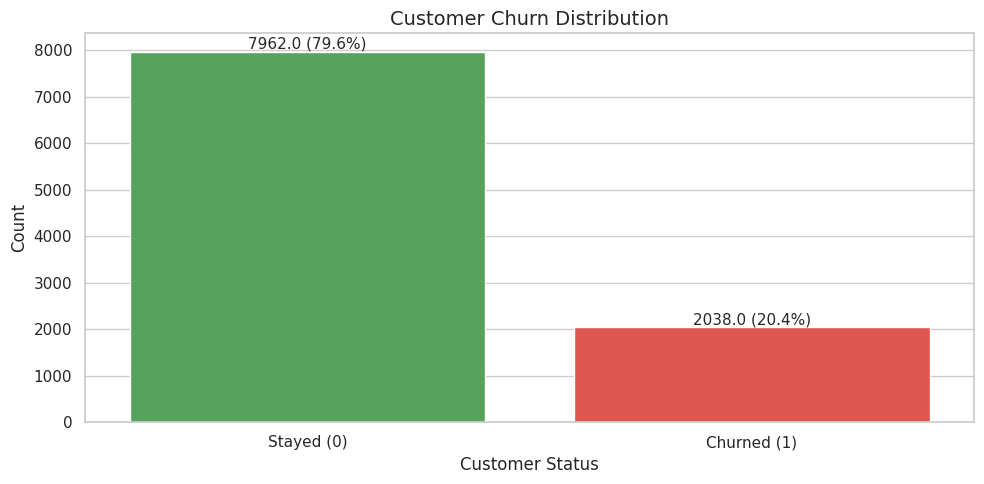

In [42]:
# Total customers
total = len(df)

# Plot
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Exited', palette={0: '#4CAF50', 1: '#F44336'})
plt.title("Customer Churn Distribution", fontsize=14)
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
ax.set_xticklabels(['Stayed (0)', 'Churned (1)'])

# Add percentage + count labels
for container in ax.containers:
    labels = [f'{v.get_height()} ({(v.get_height()/total)*100:.1f}%)' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=11)

plt.tight_layout()
plt.show()


**Analysis**

EN: The majority of customers (79.6%) stayed with the bank, while only 20.4% churned.

PT: A maioria dos clientes (79,6%) permaneceu no banco, enquanto apenas 20,4% cancelaram seus serviços.


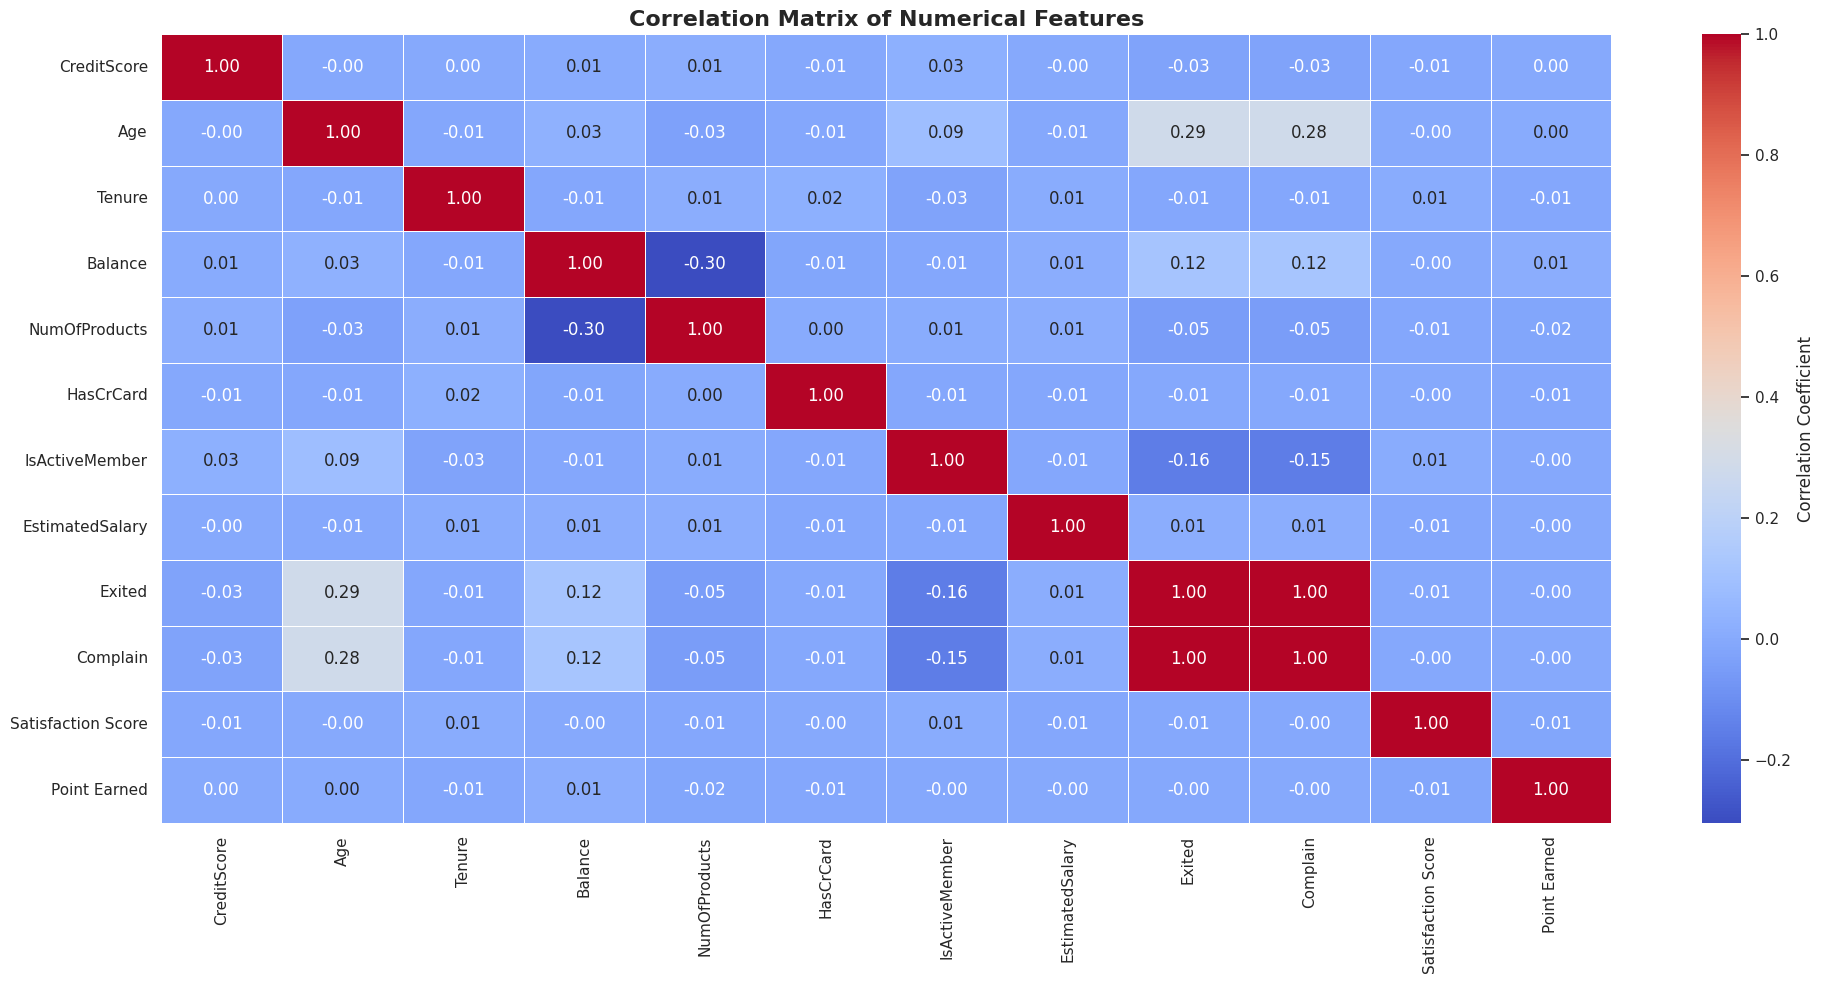

In [43]:
# Select only numeric columns (integers and floats)
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Print the list of numerical columns
#print("Numeric columns selected for correlation analysis:")
#print(num_cols.columns.tolist())

# Calculate Pearson correlation matrix
corr_matrix = num_cols.corr()

# Set visualization style
sns.set(style="white")

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",  # format decimal places
            cmap="coolwarm",
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Filter correlation matrix for strong correlations (> 0.7 or < -0.7)
strong_corr = corr_matrix[((corr_matrix > 0.7) | (corr_matrix < -0.7)) & (corr_matrix != 1.0)]

**Analysis**

EN: Age and "Exited" have the strongest correlation (0.29), indicating older clients are more likely to churn. Other features have very low correlation.

PT: A idade tem a maior correlação com o churn (0,29), sugerindo que clientes mais velhos têm maior chance de cancelar. As demais variáveis apresentam baixa correlação.

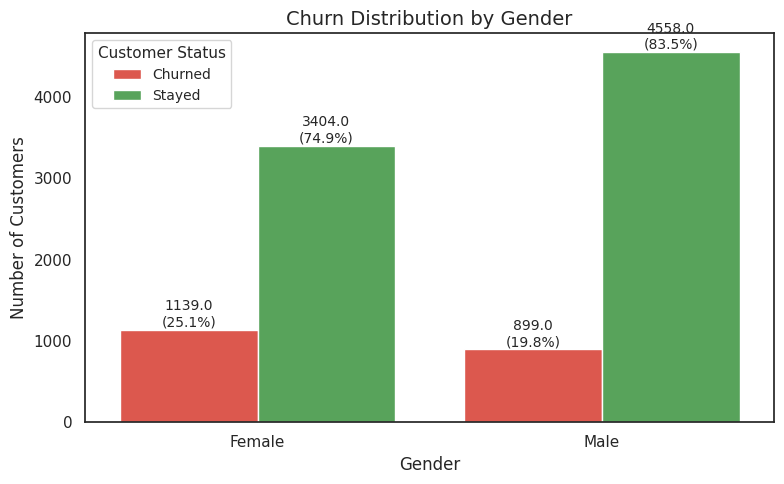

In [44]:
# Create readable churn label
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Calculate total per gender for percentage calculation
total_by_gender = df.groupby('Gender')['Exited'].count().to_dict()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender', hue='Exited_Label',
                   palette={'Stayed': '#4CAF50', 'Churned': '#F44336'})

# Title and labels
plt.title("Churn Distribution by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Customer Status", fontsize=10, title_fontsize=11)

# Add count and percentage on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        gender = ax.get_xticklabels()[int(x)].get_text()
        percentage = (height / total_by_gender[gender]) * 100
        label = f"{height}\n({percentage:.1f}%)"
        ax.annotate(label, (x, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Analysis**

EN: Female customers have a higher churn rate (25.1%) compared to males (19.8%).

PT: Clientes do sexo feminino apresentam uma taxa de churn maior (25,1%) em comparação aos homens (19,8%).

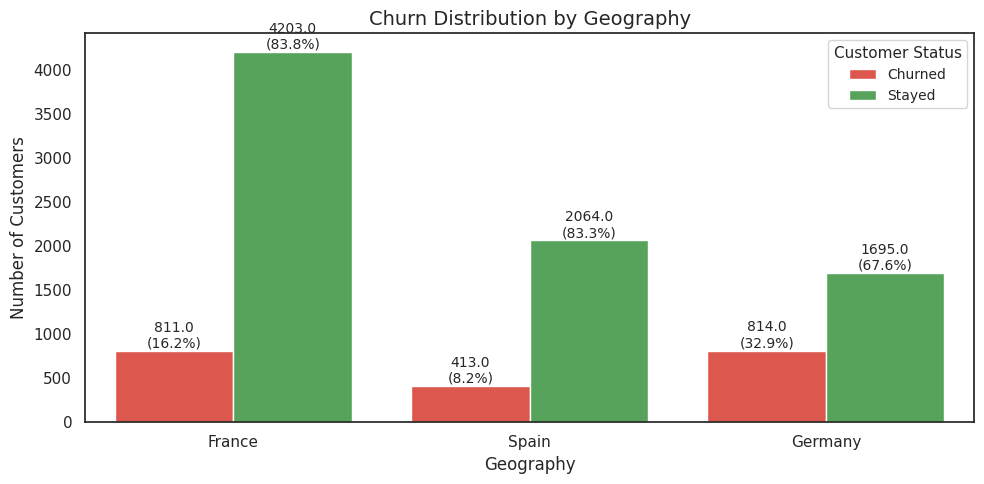

In [45]:
# Create readable label
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Total customers by country
total_by_geo = df.groupby('Geography')['Exited'].count().to_dict()

# Plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Geography', hue='Exited_Label',
                   palette={'Stayed': '#4CAF50', 'Churned': '#F44336'})

# Title and labels
plt.title("Churn Distribution by Geography", fontsize=14)
plt.xlabel("Geography", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Customer Status", fontsize=10, title_fontsize=11)

# Add count + percentage labels on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        geo = ax.get_xticklabels()[int(x)].get_text()
        percentage = (height / total_by_geo[geo]) * 100
        label = f"{height}\n({percentage:.1f}%)"
        ax.annotate(label, (x, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Analysis**

EN: Germany has the highest churn rate (32.9%), while Spain has the lowest (8.2%).

PT: A Alemanha possui a maior taxa de churn (32,9%), enquanto a Espanha apresenta a menor (8,2%).

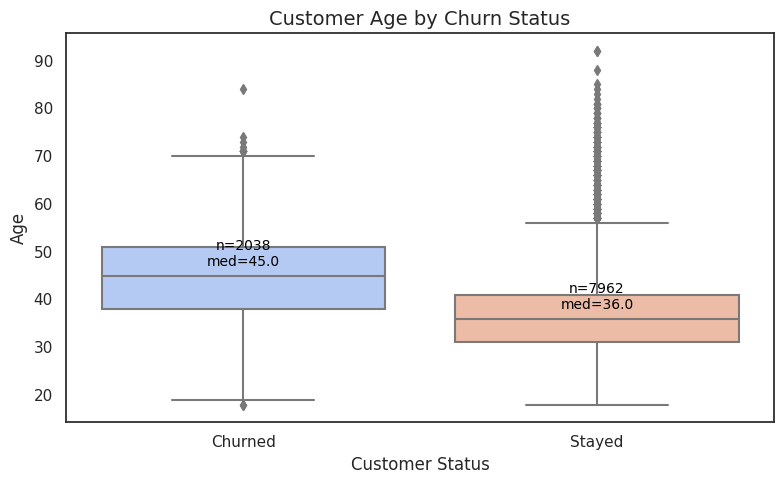

In [46]:
# Map churn labels
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})

plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='Exited_Label', y='Age', palette='coolwarm')

# Título e rótulos
plt.title("Customer Age by Churn Status", fontsize=14)
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Adiciona média e contagem como anotações
grouped = df.groupby('Exited_Label')['Age']
for i, group in enumerate(grouped):
    label = group[0]
    median = group[1].median()
    count = group[1].count()
    ax.text(i, median + 2, f"n={count}\nmed={median:.1f}", 
            horizontalalignment='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Analysis**

EN: Churned customers tend to be older (median = 45) than retained ones (median = 36).

PT: Clientes que cancelaram tendem a ser mais velhos (mediana = 45) do que os que permaneceram (mediana = 36).

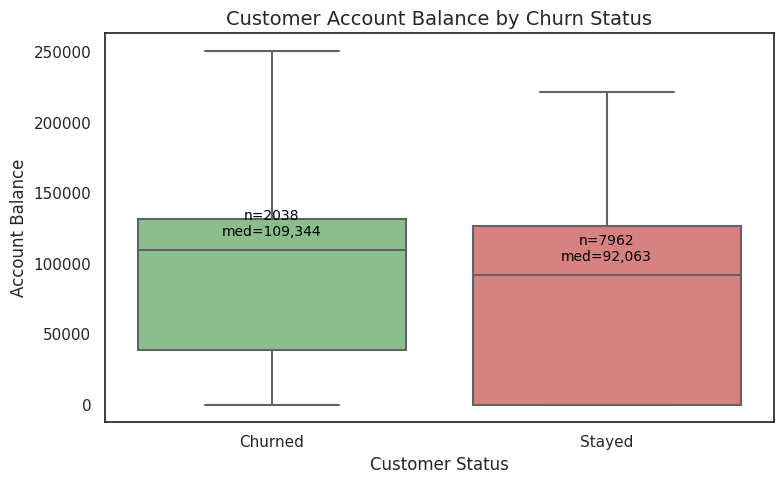

In [47]:
# Map churn labels for better readability
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Plot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='Exited_Label', y='Balance', palette=['#81C784', '#E57373'])

# Título e eixos
plt.title("Customer Account Balance by Churn Status", fontsize=14)
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Account Balance", fontsize=12)

# Adicionar rótulo com n e mediana
grouped = df.groupby('Exited_Label')['Balance']
for i, group in enumerate(grouped):
    label = group[0]
    median = group[1].median()
    count = group[1].count()
    ax.text(i, median + 10000, f"n={count}\nmed={median:,.0f}", 
            ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Analysis**

EN: Churned customers had higher account balances (median = 109,344) than those who stayed (median = 92,063).

PT: Clientes que cancelaram possuíam saldos mais altos (mediana = 109.344) do que os que permaneceram (mediana = 92.063).

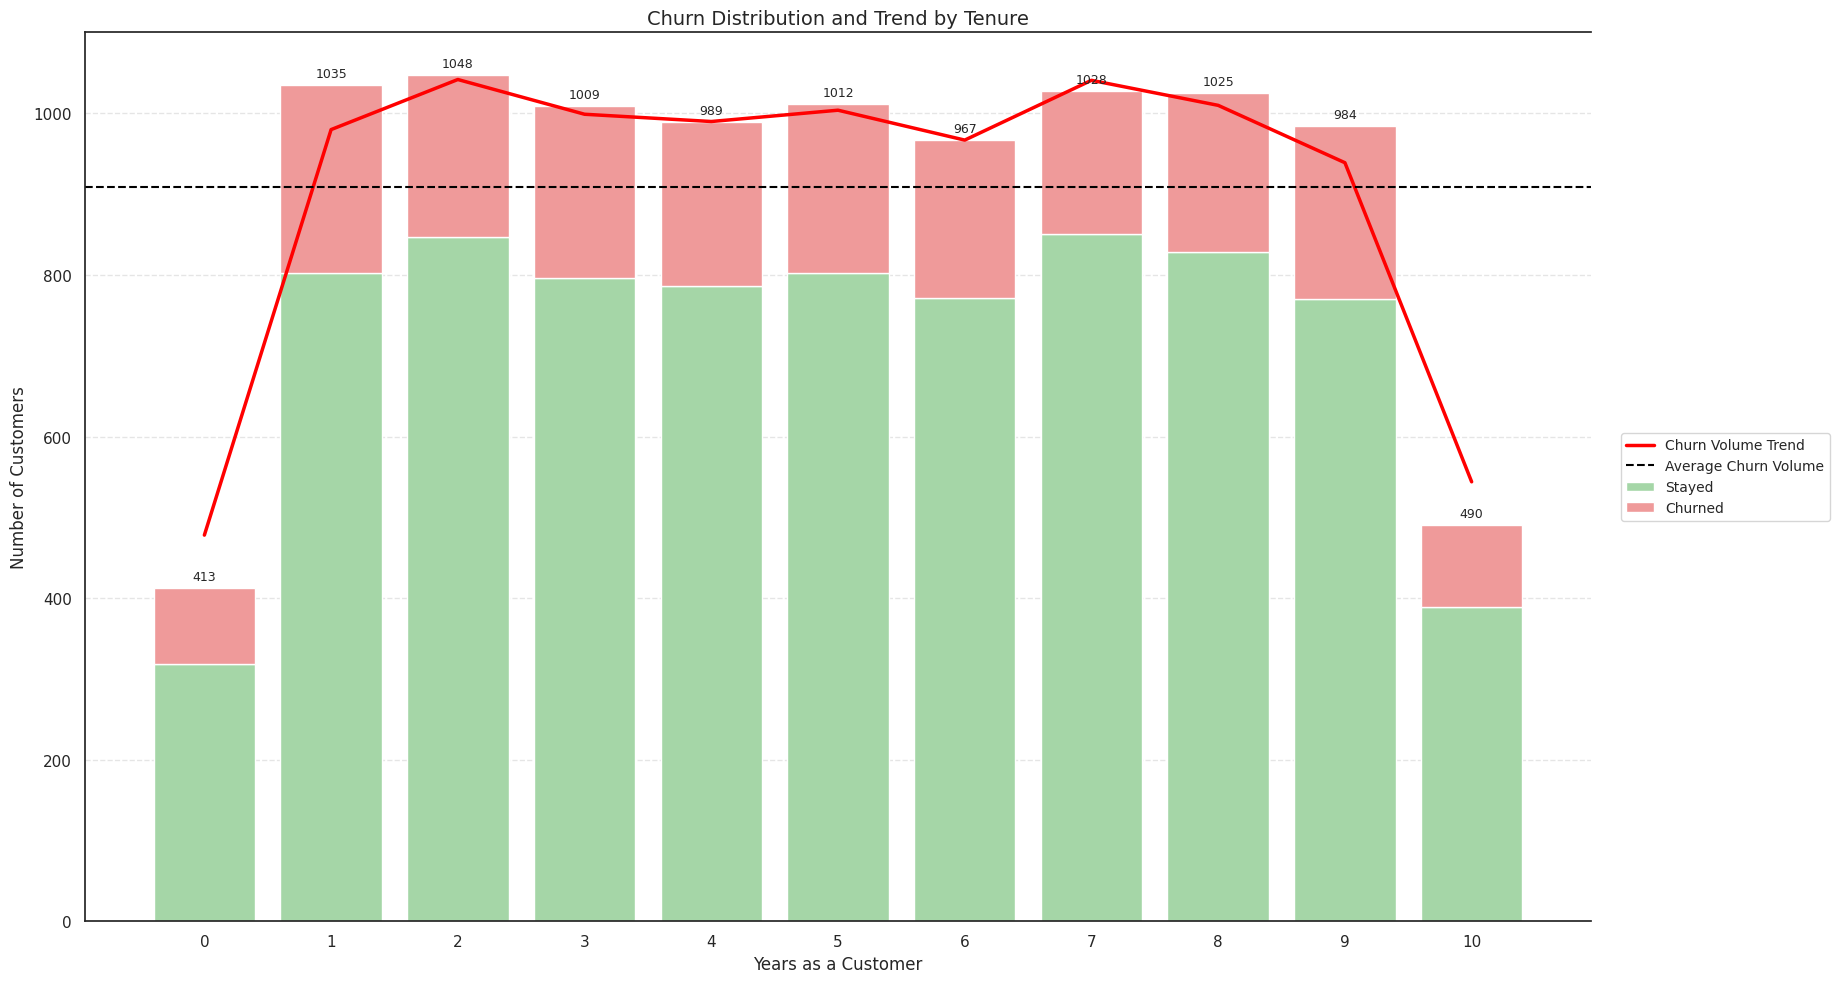

In [48]:
from scipy.ndimage import gaussian_filter1d

# Agrupar dados
grouped = df.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)
grouped.columns = ['Stayed', 'Churned']
grouped['Total'] = grouped['Stayed'] + grouped['Churned']

# Eixos X e valores
x = grouped.index
y_churn = grouped['Churned'].values
y_churn_smooth = gaussian_filter1d(y_churn, sigma=1.5)
churn_mean = y_churn_smooth.mean()

# Criar figura com espaço extra à direita
fig, ax1 = plt.subplots(figsize=(18.5, 10))
plt.subplots_adjust(right=0.78)  # espaço lateral para a legenda

# Barras empilhadas
bar_stayed = ax1.bar(x, grouped['Stayed'], color='#A5D6A7', label='Stayed', width=0.8)
bar_churned = ax1.bar(x, grouped['Churned'], bottom=grouped['Stayed'], color='#EF9A9A', label='Churned', width=0.8)

# Rótulo no topo
for i in x:
    total = grouped.loc[i, 'Total']
    ax1.text(i, total + 10, f"{int(total)}", ha='center', fontsize=9)

# Linha vermelha (churn volume trend)
ax1.plot(x, y_churn_smooth + grouped['Stayed'].values, color='red', linewidth=2.5, label='Churn Volume Trend')

# Linha preta pontilhada (média)
ax1.axhline(churn_mean + grouped['Stayed'].mean(), color='black', linestyle='--', linewidth=1.5, label='Average Churn Volume')

# Layout
ax1.set_xlabel("Years as a Customer", fontsize=12)
ax1.set_ylabel("Number of Customers", fontsize=12)
ax1.set_title("Churn Distribution and Trend by Tenure", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_xticks(x)
ax1.spines['right'].set_visible(False)

# Legenda fora do gráfico (lado direito)
ax1.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0., fontsize=10)

plt.tight_layout()
plt.show()

**Analysis**

EN: Churn happens at all tenures, with a slight peak around 1–8 years. Customers with 0 or 10 years show less churn.

PT: O churn ocorre em todos os períodos de relacionamento, com um leve pico entre 1 e 8 anos. Clientes com 0 ou 10 anos tendem a cancelar menos.

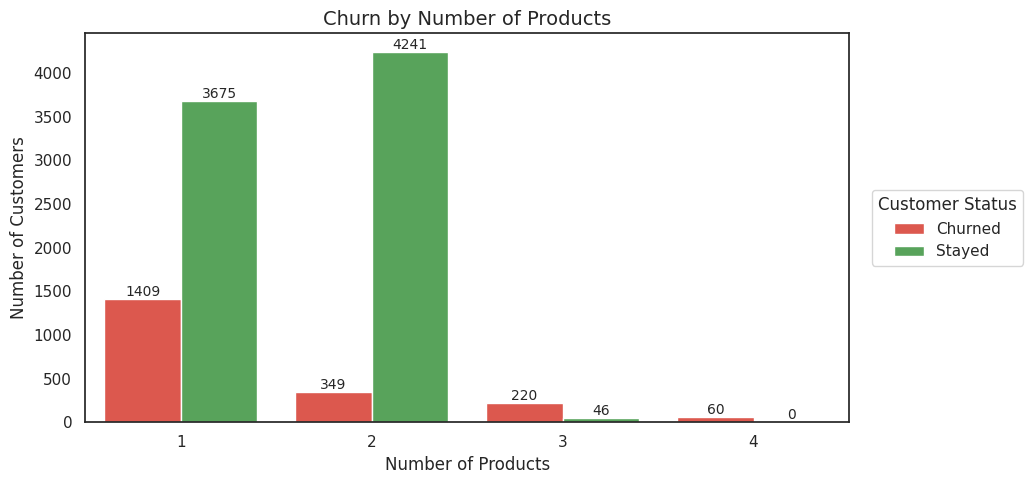

In [49]:
# Map churn labels to readable categories
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Create figure and axis for the plot
plt.figure(figsize=(10.5, 5))

# Create a countplot showing the number of customers by number of products,
# separated by churn status (Stayed vs Churned) with intuitive color palette
ax = sns.countplot(data=df,
                   x='NumOfProducts',
                   hue='Exited_Label',
                   palette={'Stayed': '#4CAF50', 'Churned': '#F44336'}  # Green for stayed, red for churned
                  )

# Set the title and axis labels
plt.title("Churn by Number of Products", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Add count labels on top of each bar for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Move the legend to the right side of the plot for better layout
ax.legend(title="Customer Status", bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout to prevent clipping of labels or legend
plt.tight_layout()

# Show the final plot
plt.show()

**Analysis**

EN: Customers with fewer products (especially 1) are more likely to churn. Almost no churn occurs with 4 products.

PT: Clientes com menos produtos (especialmente apenas 1) têm maior chance de churn. Quase não há cancelamento entre clientes com 4 produtos.

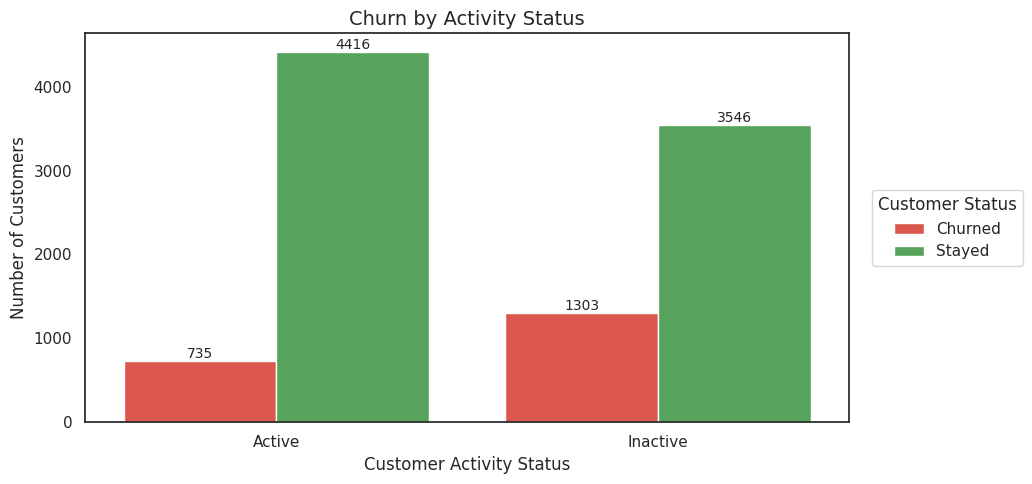

In [50]:
# Map churn and activity labels for readability
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})
df['Activity_Label'] = df['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})

# Create figure and axis for the plot
plt.figure(figsize=(10.5, 5))
ax = sns.countplot(
    data=df,
    x='Activity_Label',
    hue='Exited_Label',
    palette={'Stayed': '#4CAF50', 'Churned': '#F44336'}
)

# Set titles and labels
plt.title("Churn by Activity Status", fontsize=14)
plt.xlabel("Customer Activity Status", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Move the legend to the right side
ax.legend(title="Customer Status", bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()
plt.show()

**Analysis**

EN: Inactive customers are more likely to churn (26.9%) compared to active ones (14.3%).

PT: Clientes inativos têm maior probabilidade de churn (26,9%) do que os ativos (14,3%).

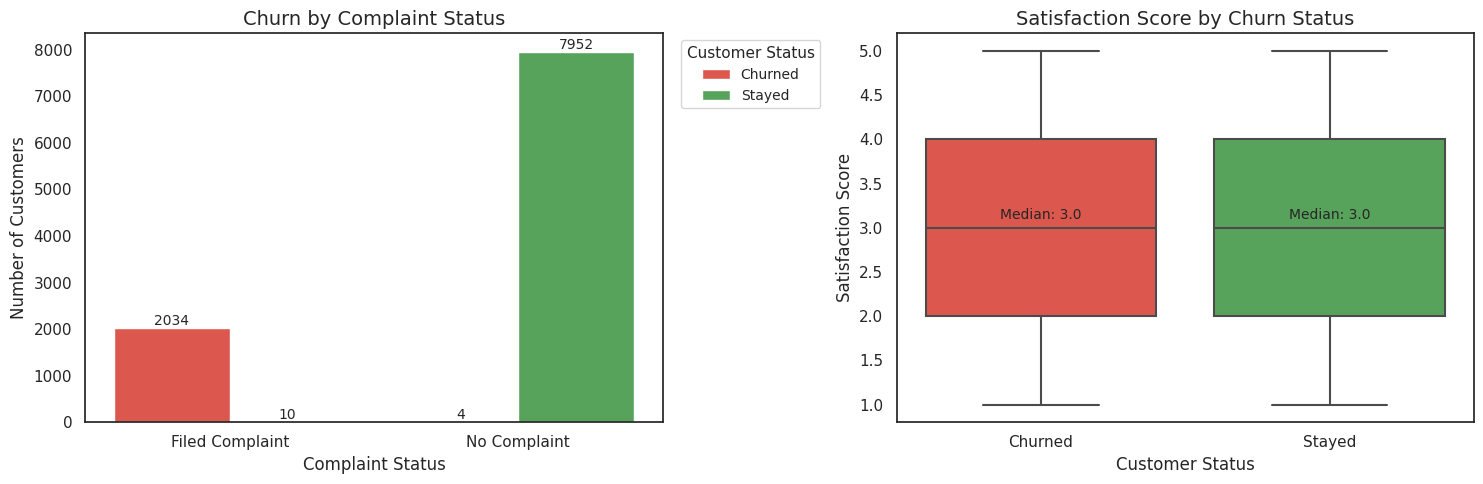

In [51]:
# Map readable labels
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})
df['Complain_Label'] = df['Complain'].map({0: 'No Complaint', 1: 'Filed Complaint'})

# Create subplot figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.6)

# -------------------------
# Plot 1: Complaint Status vs Churn
# -------------------------
ax1 = sns.countplot(
    data=df,
    x='Complain_Label',
    hue='Exited_Label',
    palette={'Stayed': '#4CAF50', 'Churned': '#F44336'},
    ax=axes[0]
)

ax1.set_title("Churn by Complaint Status", fontsize=14)
ax1.set_xlabel("Complaint Status", fontsize=12)
ax1.set_ylabel("Number of Customers", fontsize=12)

# Add counts on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Custom legend on the side
ax1.legend(
    title="Customer Status",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=10,
    title_fontsize=11
)

# -------------------------
# Plot 2: Satisfaction Score vs Churn
# -------------------------
ax2 = sns.boxplot(
    data=df,
    x='Exited_Label',
    y='Satisfaction Score',
    palette={'Stayed': '#4CAF50', 'Churned': '#F44336'},
    ax=axes[1]
)

ax2.set_title("Satisfaction Score by Churn Status", fontsize=14)
ax2.set_xlabel("Customer Status", fontsize=12)
ax2.set_ylabel("Satisfaction Score", fontsize=12)

# Remove inherited legend (if any)
if ax2.get_legend() is not None:
    ax2.get_legend().remove()

# Add median values on boxplot
grouped = df.groupby('Exited_Label')['Satisfaction Score']
for i, group in enumerate(grouped):
    median = group[1].median()
    ax2.text(i, median + 0.1, f"Median: {median:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


**Analysis**

EN: Nearly all customers who churned had filed a complaint. Almost no churn occurred among those without complaints.

PT: Praticamente todos os clientes que cancelaram haviam registrado reclamações. Entre os que não reclamaram, quase não houve churn.

# Part 4.1 - Exploratory Data Analysis Indicators 

**Faixas Etárias (Binning de Idade) vs Churn**

- Objetivo: Ver se há faixas etárias com maior propensão ao churn.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


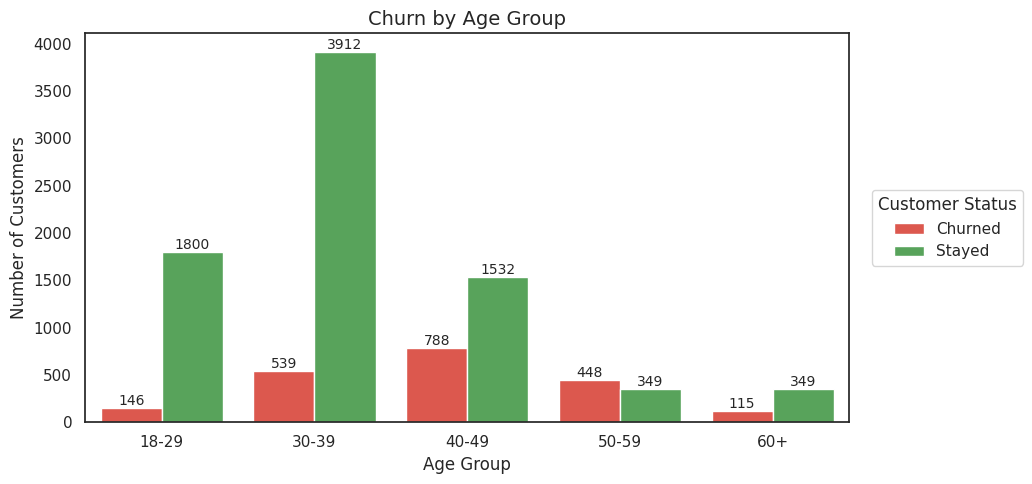

In [52]:
# Criar faixas etárias
bins = [18, 30, 40, 50, 60, 92]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Mapeia churn
df['Exited_Label'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Gráfico
plt.figure(figsize=(10.5, 5))
ax = sns.countplot(data=df, x='AgeGroup', hue='Exited_Label',
                   palette={'Stayed': '#4CAF50', 'Churned': '#F44336'})

plt.title('Churn by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

ax.legend(title='Customer Status', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()

**Gráfico de Crédito Score (faixas) vs Churn**

- Objetivo: Ver se clientes com scores mais baixos têm maior risco de churn.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


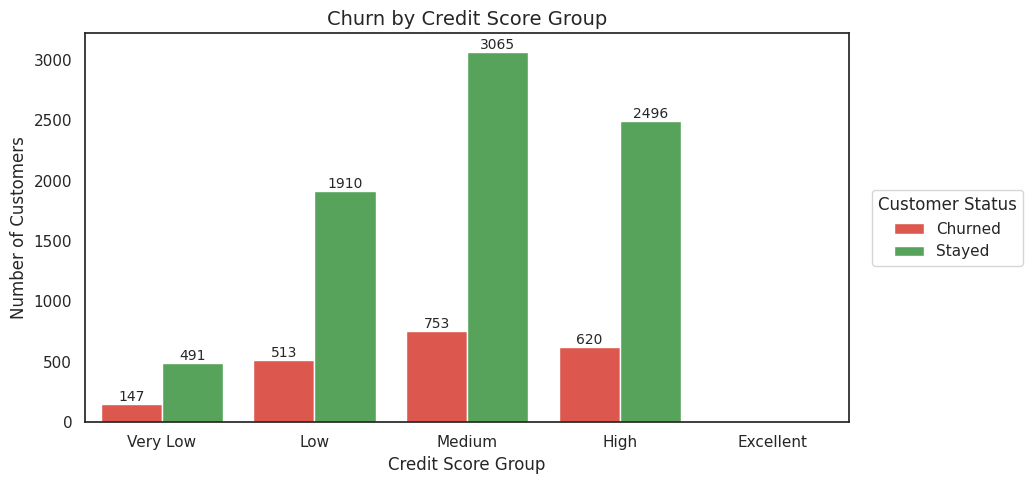

In [53]:
# Criar faixas de crédito
credit_bins = [350, 500, 600, 700, 850, 1000]
credit_labels = ['Very Low', 'Low', 'Medium', 'High', 'Excellent']
df['CreditGroup'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=credit_labels)

# Gráfico
plt.figure(figsize=(10.5, 5))
ax = sns.countplot(data=df, x='CreditGroup', hue='Exited_Label',
                   palette={'Stayed': '#4CAF50', 'Churned': '#F44336'})

plt.title('Churn by Credit Score Group', fontsize=14)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

ax.legend(title='Customer Status', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()

**Gráfico de Boxplot: Salary vs Churn**

- Objetivo: Explorar se clientes com maiores salários tendem a cancelar mais.

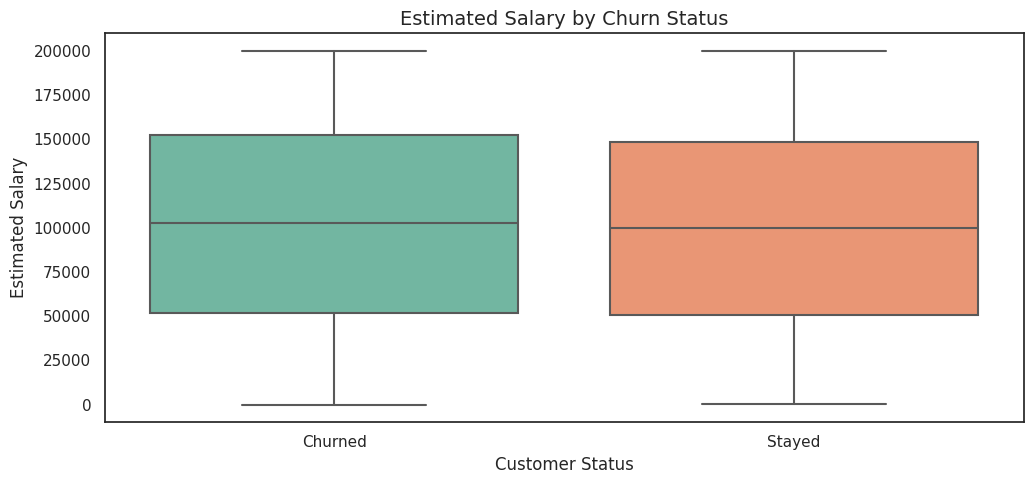

In [54]:
plt.figure(figsize=(10.5, 5))
sns.boxplot(data=df, x='Exited_Label', y='EstimatedSalary', palette='Set2')
plt.title('Estimated Salary by Churn Status', fontsize=14)
plt.xlabel('Customer Status', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.tight_layout()
plt.show()

**Gráfico de ScoreCard (KPI Churn Rate por Grupo)**

- Objetivo: Usar KPI cards visuais para mostrar taxa de churn por grupo.

/tmp/ipykernel_165/717376031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('AgeGroup')['Exited'].mean().round(2) * 100


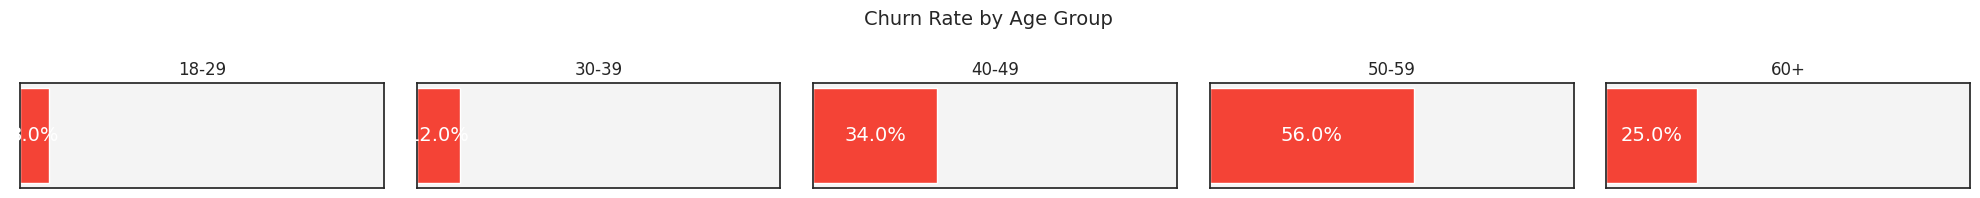

In [55]:
# Taxa de churn por faixa etária
churn_rate = df.groupby('AgeGroup')['Exited'].mean().round(2) * 100

# Gráfico tipo card
plt.figure(figsize=(20, 2))
for i, (group, rate) in enumerate(churn_rate.items()):
    plt.subplot(1, len(churn_rate), i+1)
    plt.gca().set_facecolor('#f4f4f4')
    plt.barh([''], [rate], color='#F44336')
    plt.title(group, fontsize=12)
    plt.xlim(0, 100)
    plt.xticks([])
    plt.yticks([])
    plt.text(rate/2, 0, f"{rate:.1f}%", va='center', ha='center', fontsize=14, color='white')
plt.suptitle('Churn Rate by Age Group', fontsize=14)
plt.tight_layout()
plt.show()

# Part 4.2 - Exploratory Data Analysis Credit Score 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


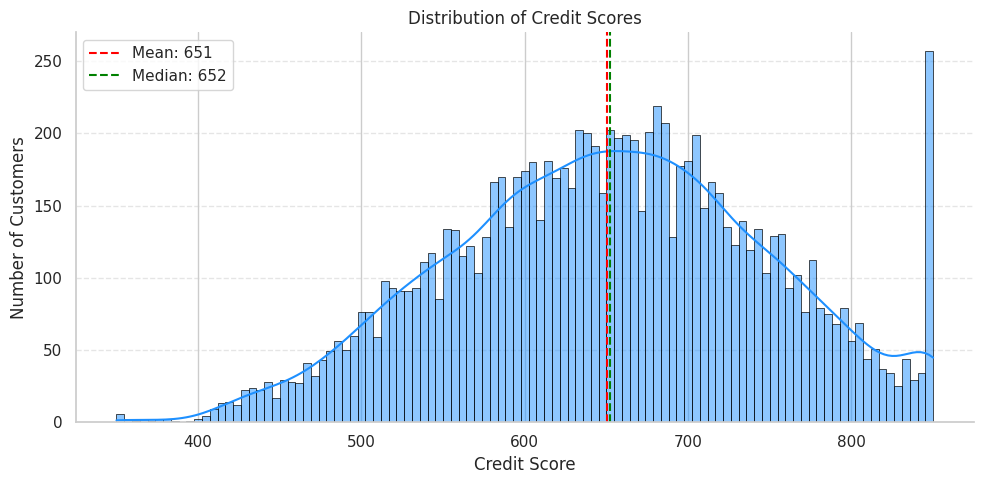

In [56]:
sns.set(style="whitegrid")  # Clean style

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='CreditScore', bins=105, kde=True, color='dodgerblue', edgecolor='black')

# Mean and median
mean_score = df['CreditScore'].mean()
median_score = df['CreditScore'].median()
plt.axvline(mean_score, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_score:.0f}')
plt.axvline(median_score, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_score:.0f}')
plt.legend()

# Titles and axes
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


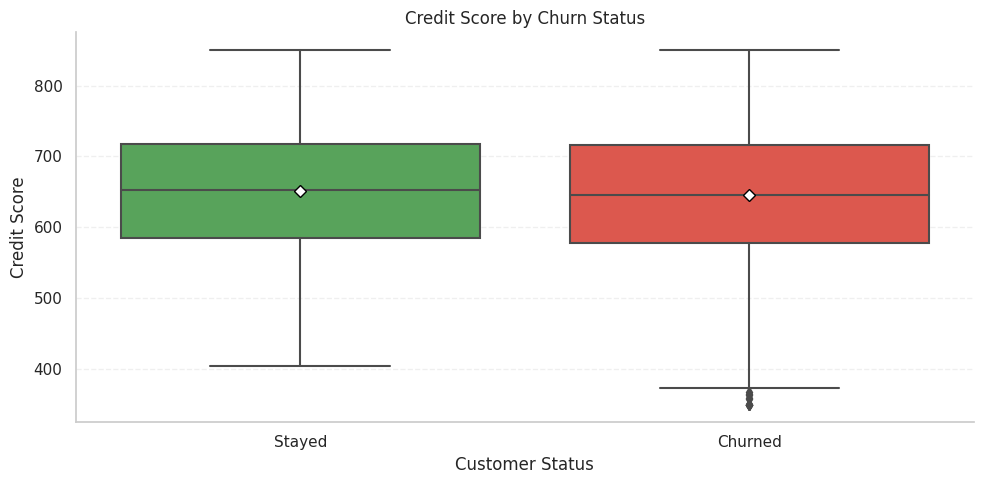

In [57]:
# Order the categories to display 'Stayed' first
df['Exited_Label'] = pd.Categorical(df['Exited_Label'], categories=['Stayed', 'Churned'], ordered=True)

# Create the plot
plt.figure(figsize=(10, 5))

# Customize the appearance of the mean point on the boxplot
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='white')

# Draw the boxplot
sns.boxplot(data=df, x='Exited_Label', y='CreditScore',
            palette=['#4CAF50', '#F44336'],  # green for 'Stayed', red for 'Churned'
            showmeans=True, meanprops=meanpointprops)

# Set titles and axis labels
plt.title('Credit Score by Churn Status')
plt.xlabel('Customer Status')
plt.ylabel('Credit Score')

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines for a cleaner look
sns.despine()

# Adjust the layout to prevent clipping
plt.tight_layout()

# Show the final plot
plt.show()

# Part 4.3 - Exploratory Data Analysis occurrence of churn

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


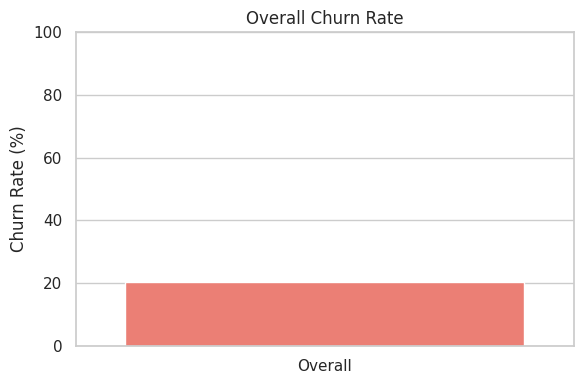

In [59]:
# Calcular a taxa de churn geral usando a coluna de texto
overall_churn_rate = df['Exited_Label'].value_counts(normalize=True).loc['Churned'] * 100

# Criar gráfico de barras com a taxa de churn
plt.figure(figsize=(6, 4))
sns.barplot(x=['Overall'], y=[overall_churn_rate], color='#FF6F61')

# Títulos e rótulos
plt.title('Overall Churn Rate')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


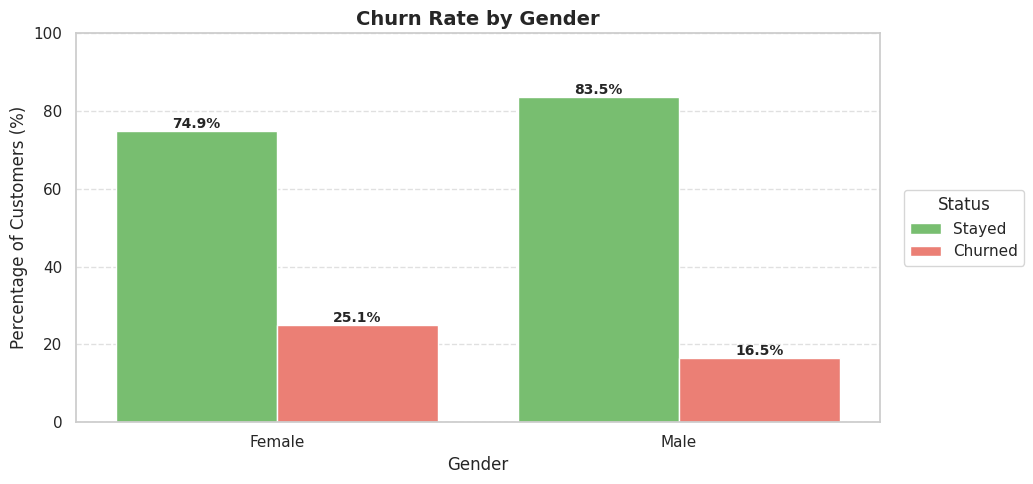

In [65]:
# Reverter valores se já estiverem como strings
df['Exited'] = df['Exited'].map({'Stayed': 0, 'Churned': 1})

# Calcular churn por gênero
churn_by_gender = df.groupby('Gender')['Exited'].value_counts(normalize=True).unstack().fillna(0) * 100

# Resetar e derreter o DataFrame
churn_by_gender = churn_by_gender.reset_index().melt(id_vars='Gender', var_name='Status', value_name='Rate')

# Mapear 0/1 para rótulos
status_map = {0: 'Stayed', 1: 'Churned'}
churn_by_gender['Status'] = churn_by_gender['Status'].map(status_map)

# Gráfico
plt.figure(figsize=(10.5, 5))
barplot = sns.barplot(data=churn_by_gender, x='Gender', y='Rate', hue='Status',
                      palette={'Churned': '#FF6F61', 'Stayed': '#6ECB63'})

# Adicionar valores nas barras
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajustes visuais
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Status', loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

/tmp/ipykernel_165/516962359.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('AgeGroup')['Exited'].value_counts(normalize=True).unstack().fillna(0) * 100
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

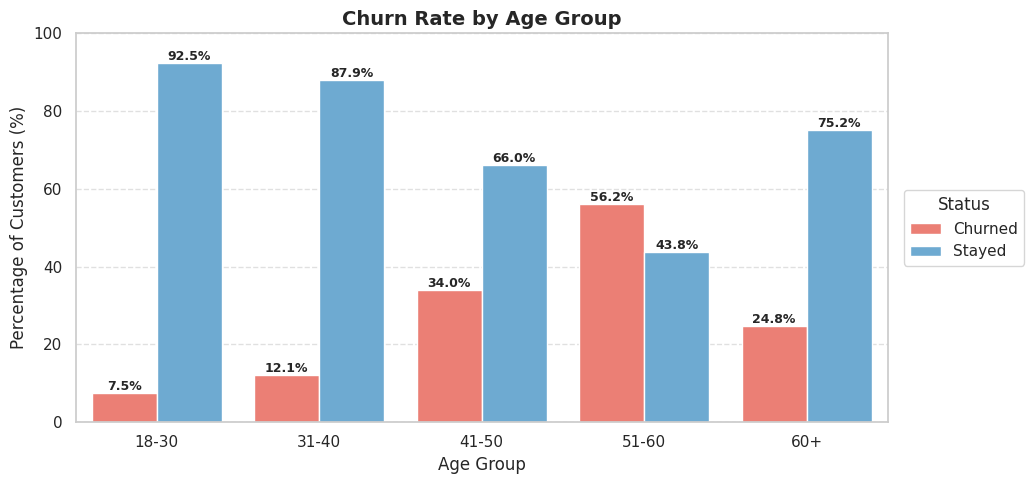

In [61]:
# Recarrega os dados
df = pd.read_csv("dataset_clean.csv")

# Recria a coluna de faixa etária
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 30, 40, 50, 60, 100],
                        labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Converte a coluna Exited para texto para representar o status
df['Exited'] = df['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Calcula a taxa de churn por faixa etária
churn_by_age = df.groupby('AgeGroup')['Exited'].value_counts(normalize=True).unstack().fillna(0) * 100
churn_by_age = churn_by_age.reset_index().melt(id_vars='AgeGroup', var_name='Status', value_name='Rate')

# Plot com azul e vermelho e legenda ao lado
plt.figure(figsize=(10.5, 5))
barplot = sns.barplot(data=churn_by_age, x='AgeGroup', y='Rate', hue='Status',
                      palette={'Churned': '#FF6F61', 'Stayed': '#5DADE2'})

# Adiciona os valores acima das barras
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.1f}%',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Churn Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Status', loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

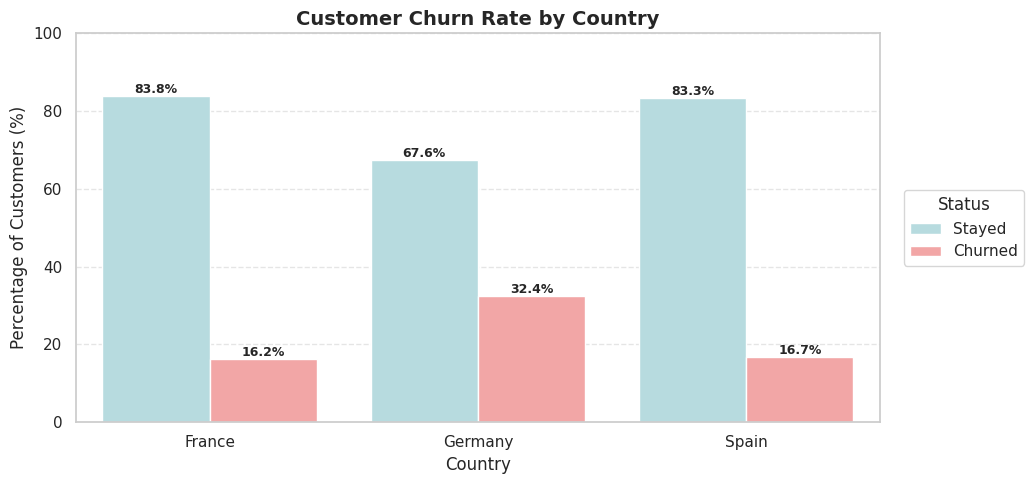

In [66]:
# Recriar a variável churn_by_geo com base no DataFrame df
churn_by_geo = df.groupby('Geography')['Exited'].value_counts(normalize=True).unstack().fillna(0) * 100
churn_by_geo = churn_by_geo.rename(columns={0: 'Stayed', 1: 'Churned'})
churn_by_geo = churn_by_geo.reset_index().melt(id_vars='Geography', var_name='Status', value_name='Rate')

# Gerar o gráfico atualizado
plt.figure(figsize=(10.5, 5))
barplot = sns.barplot(data=churn_by_geo, x='Geography', y='Rate', hue='Status',
                      palette={'Churned': '#FF9999', 'Stayed': '#B0E0E6'})

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Customer Churn Rate by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.ylim(0, 100)

plt.legend(title='Status', loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Part 5 - Pre-processing

In [67]:
data = pd.read_csv("/kaggle/working/dataset_clean.csv")
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# Part 6 - Feature Engineering

In [68]:
# Identify categorical columns (of type 'object')
cat_cols = data.select_dtypes(include='object').columns

# Apply LabelEncoder to all categorical columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le  # store the encoders in case inverse transformation is needed later

le

LabelEncoder()

In [69]:
# Check the result
print("Encoded columns:", cat_cols.tolist())

Encoded columns: ['Surname', 'Geography', 'Gender', 'Card Type']


In [70]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,289,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


# Part 7 - Training and testing division

In [71]:
# Separate X (features) and y (target)
X = data.drop(columns='Exited')

# Define y as the target variable
y = data['Exited']

In [72]:
X.shape

(10000, 15)

In [73]:
y.shape

(10000,)

# Part 8 - Model Training

In [74]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [75]:
# Escalonamento dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#
scaler

StandardScaler()

# Part 9 - Model Machine learning

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Dicionário de modelos
models = {'Naive Bayes': GaussianNB(),
           'KNN': KNeighborsClassifier(n_neighbors=5),
           'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
           'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
           'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),

          
           'XGBoost': XGBClassifier(use_label_encoder=False,
                                    eval_metric='logloss',
                                    random_state=42,
                                    n_estimators=200,           # Número de árvores (aumentar pode ajudar até certo ponto)
                                    learning_rate=0.05,         # Taxa de aprendizado menor para mais estabilidade
                                    max_depth=6,                # Profundidade máxima da árvore
                                    subsample=0.8,              # Amostragem de linhas (reduz overfitting)
                                    colsample_bytree=0.8,       # Amostragem de colunas por árvore
                                    gamma=1,                    # Reduz splits menos relevantes (regularização)
                                    reg_alpha=0.1,              # Regularização L1
                                    reg_lambda=1.0              # Regularização L2
                                   ),
          
           'LightGBM': LGBMClassifier(random_state=42,
                                      n_estimators=200,
                                      learning_rate=0.05,
                                      max_depth=6,
                                      num_leaves=31,             # 2^max_depth geralmente é bom
                                      subsample=0.8,
                                      colsample_bytree=0.8,
                                      reg_alpha=0.1,
                                      reg_lambda=1.0,
                                      verbose=-1,
                                      min_child_samples=20       # Número mínimo de amostras por folha
                                     ),
    
           'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
           'Bagging': BaggingClassifier(n_estimators=100, random_state=42),
           "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
           'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42)
}

# Store performance results for each model
results = []

# Loop through all models and evaluate them
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    preds = model.predict(X_test)               # Predicted labels
    probs = model.predict_proba(X_test)[:, 1]   # Predicted probabilities

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc = roc_auc_score(y_test, probs)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "ROC-AUC": roc
    })

# Convert results into a DataFrame and sort by ROC-AUC
df_results = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
df_results.reset_index(drop=True, inplace=True)
df_results

,Model,Accuracy,F1-Score,ROC-AUC
0,Extra Trees,0.9985,0.996319,0.999303
1,LightGBM,0.9985,0.996319,0.998613
2,XGBoost,0.9985,0.996319,0.998485
3,Naive Bayes,0.9985,0.996319,0.998457
4,HistGradientBoosting,0.9985,0.996319,0.997965
5,Gradient Boosting,0.9975,0.993865,0.997902
6,Random Forest,0.9985,0.996319,0.997866
7,Bagging,0.9980,0.995098,0.997501
8,KNN,0.9970,0.992611,0.997198
9,AdaBoost,0.9985,0.996319,0.996553


# Part 10 - Metrics and Evaluations

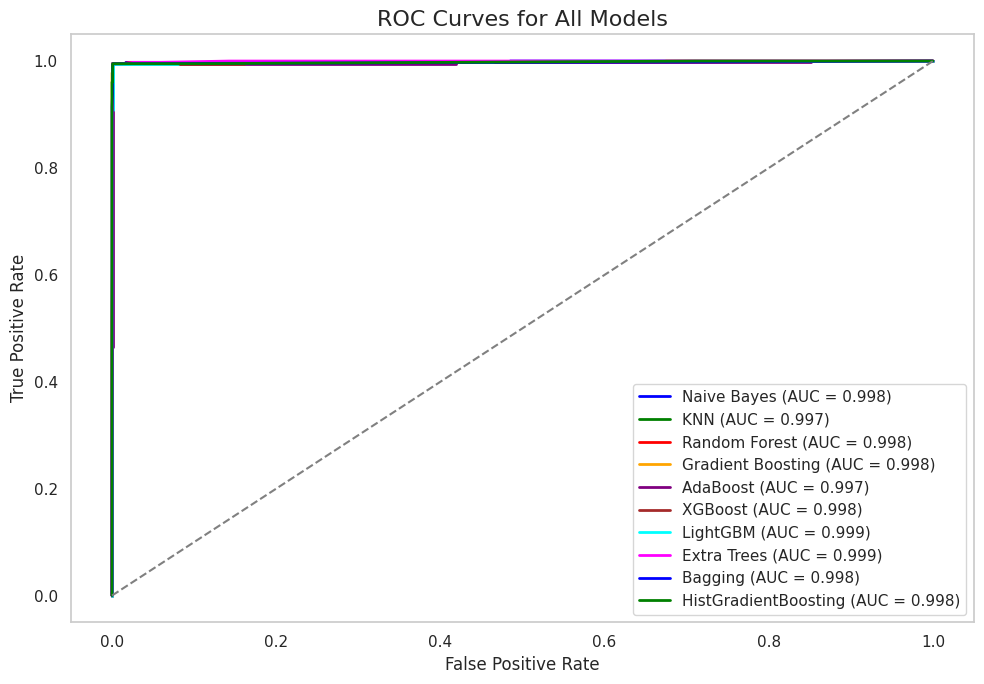

In [77]:
# List of colors for distinguishing models
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan', 'magenta']

plt.figure(figsize=(10, 7))
plt.title("ROC Curves for All Models", fontsize=16)

# Plot ROC curve for each trained model
for idx, (name, model) in enumerate(models.items()):
    # Predicted probabilities for positive class
    probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color=colors[idx % len(colors)],
             label=f"{name} (AUC = {roc_auc:.3f})", linewidth=2)

# Reference diagonal line (random guess)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Graph styling
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.grid(False)
plt.show()

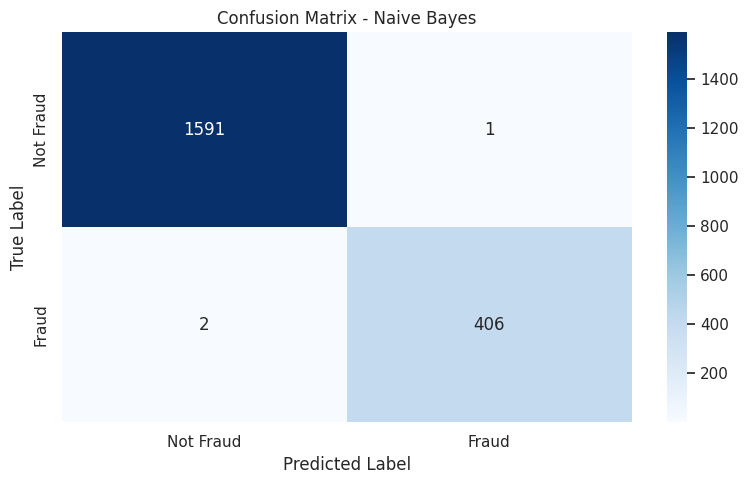

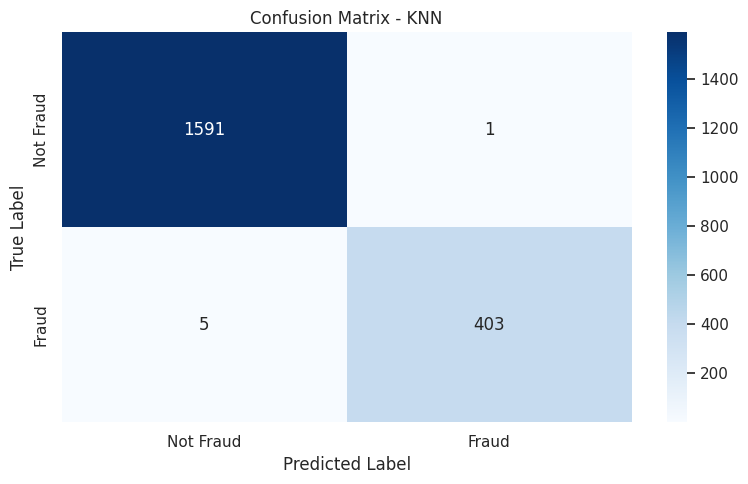

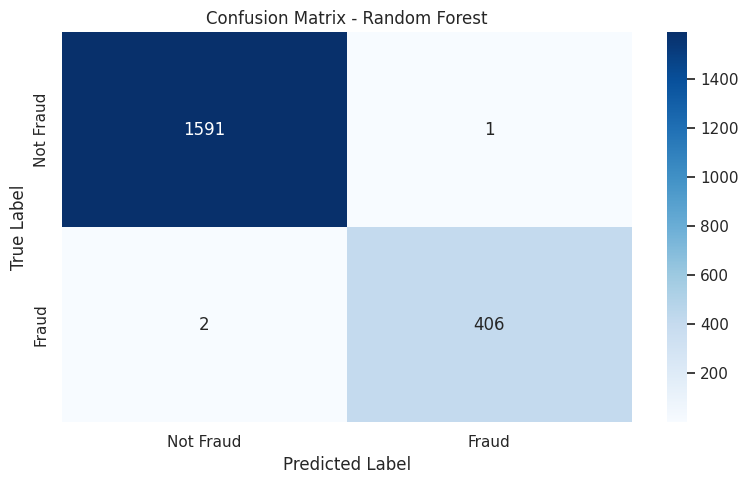

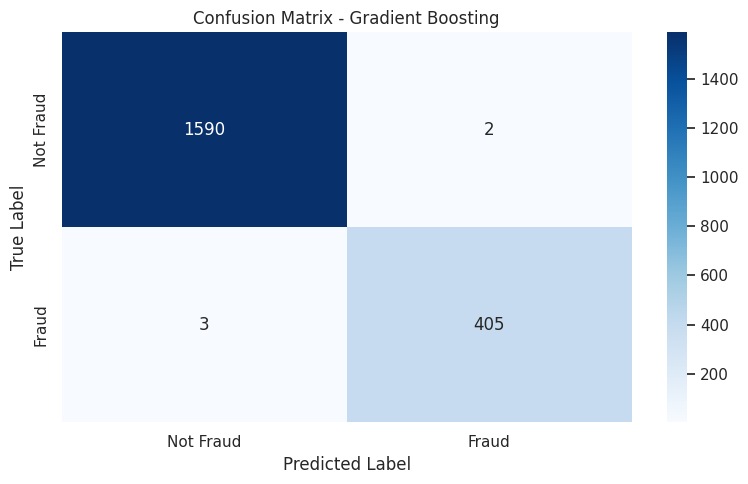

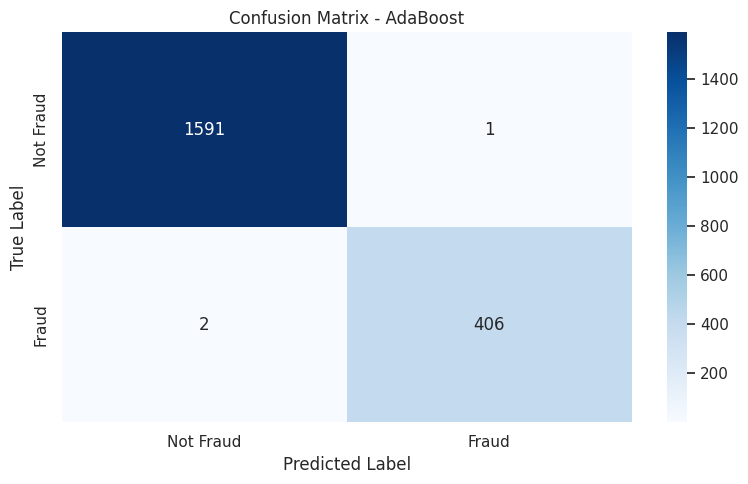

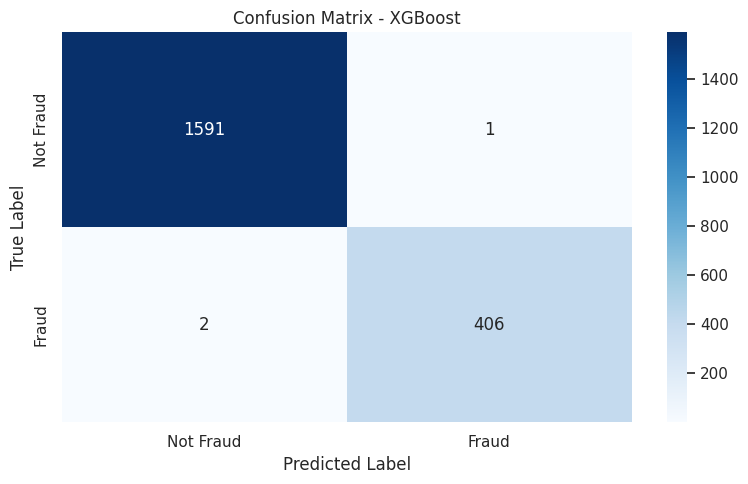

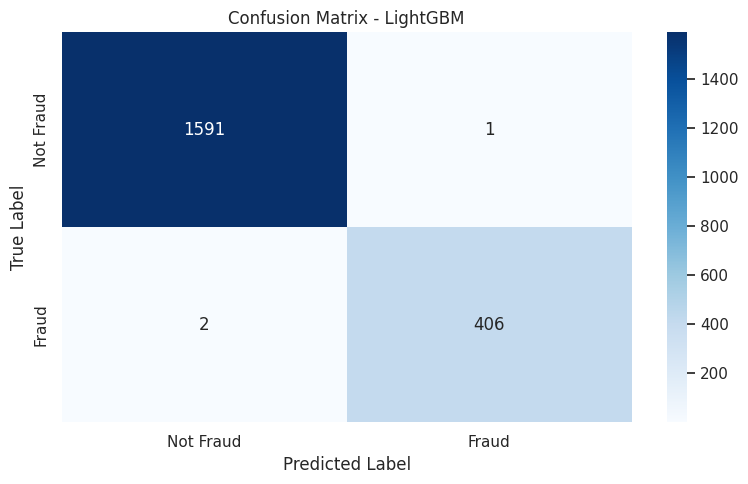

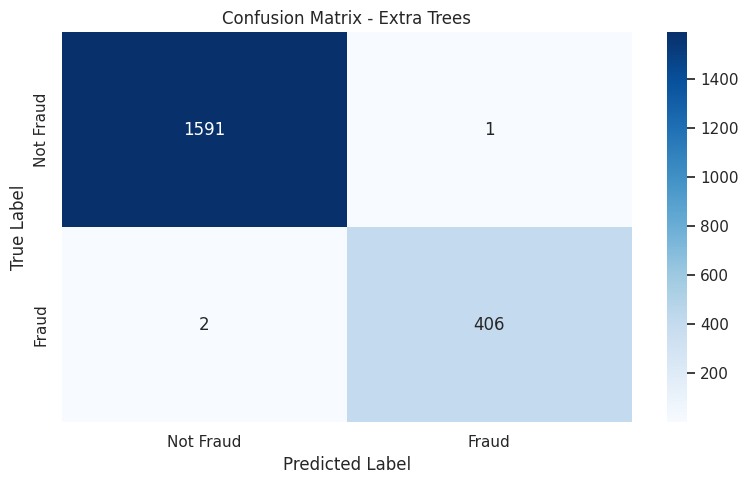

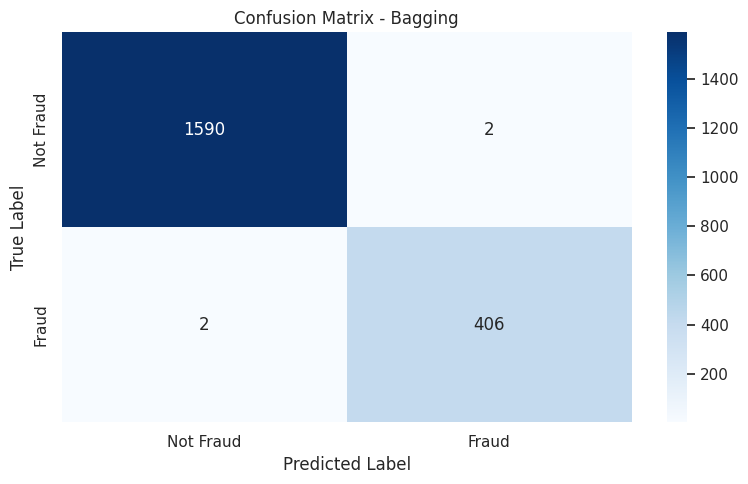

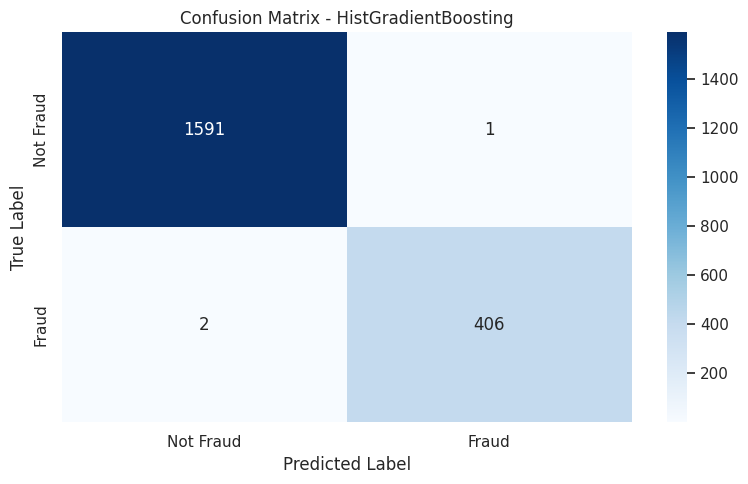

In [78]:
# Function to plot confusion matrix using seaborn
def plot_confusion_seaborn(model, X_test, y_test, model_name):
    
    # Get predictions
    preds = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, preds)
    
    # Plot
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"])
    
    plt.title(f"Confusion Matrix - {model_name}", fontsize=12)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Loop over all models and plot their confusion matrices
for name, model in models.items():
    plot_confusion_seaborn(model, 
                           X_test, 
                           y_test,
                           name)

In [79]:
# Loop through all models to print classification reports
for name, model in models.items():
    print(f"\nClassification Report - {name}")
    
    # Predict labels
    preds = model.predict(X_test)
    
    # Display precision, recall, F1-score, and support
    print(classification_report(
        y_test,
        preds,
        target_names=["Not Fraud", "Fraud"]
    ))


Classification Report - Naive Bayes
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      1592
       Fraud       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Classification Report - KNN
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      1592
       Fraud       1.00      0.99      0.99       408

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Classification Report - Random Forest
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      1592
       Fraud       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00

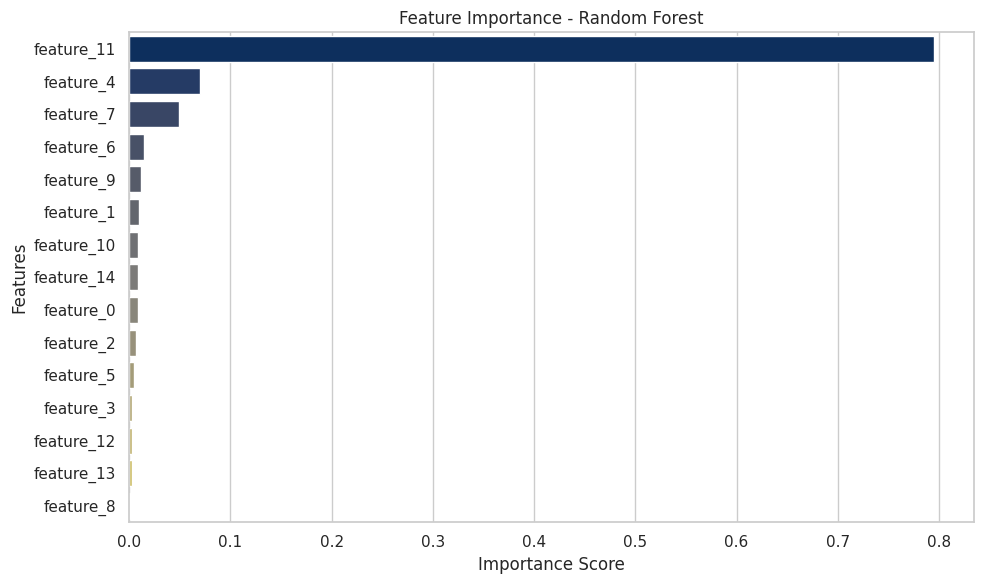

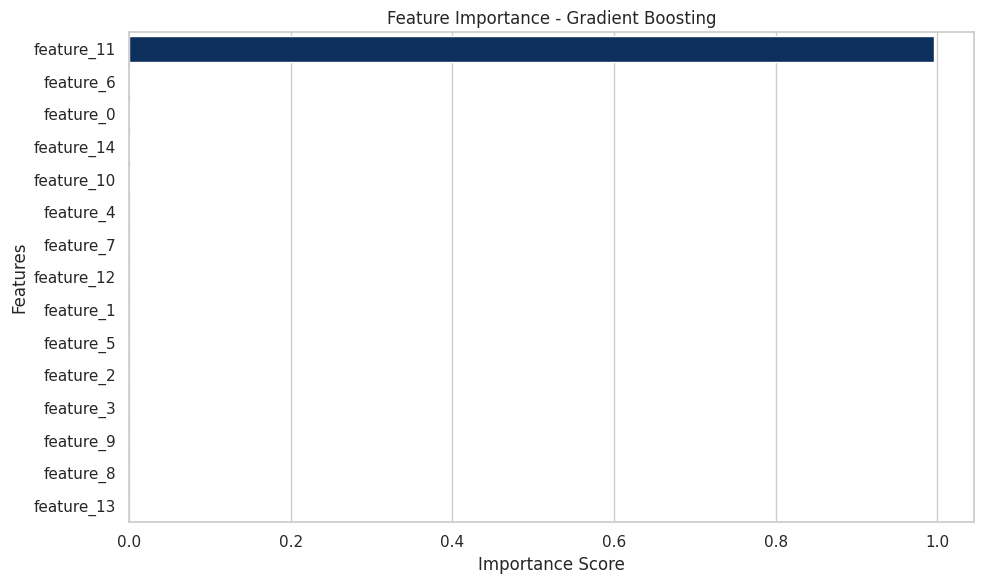

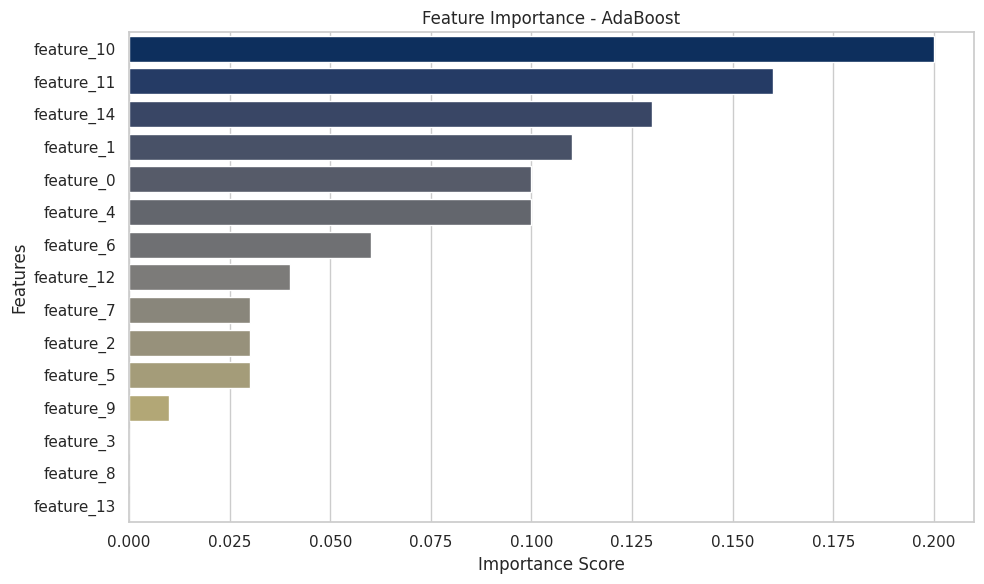

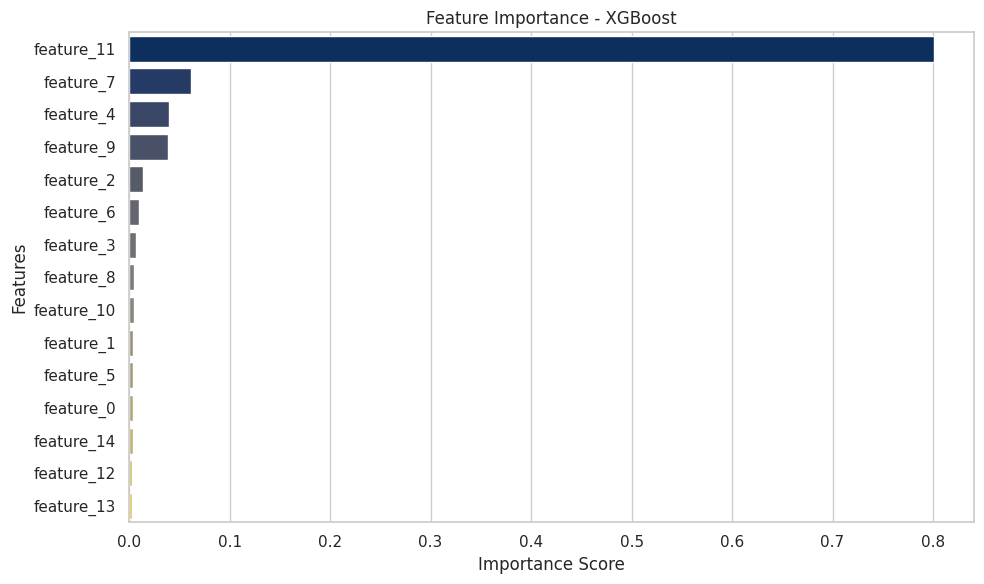

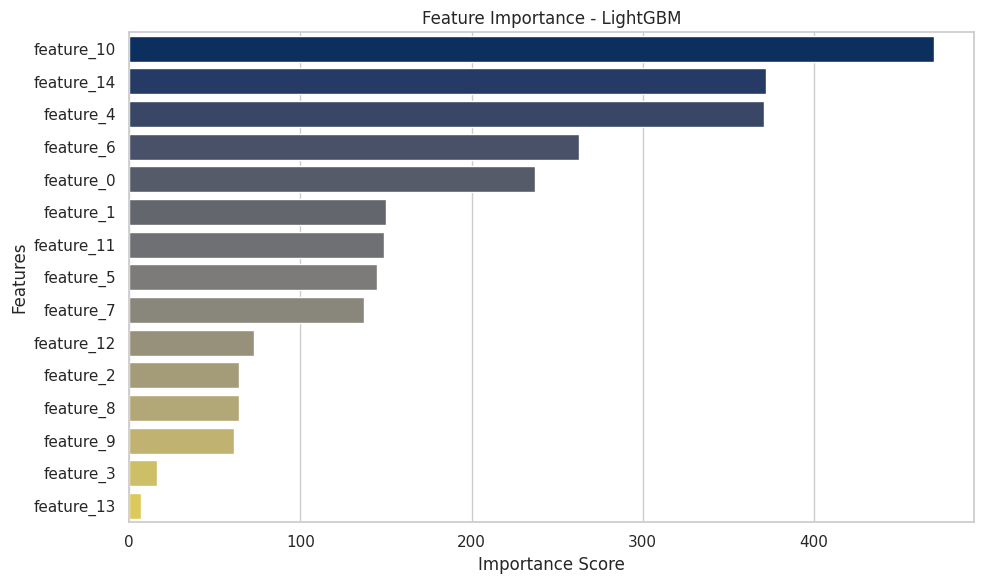

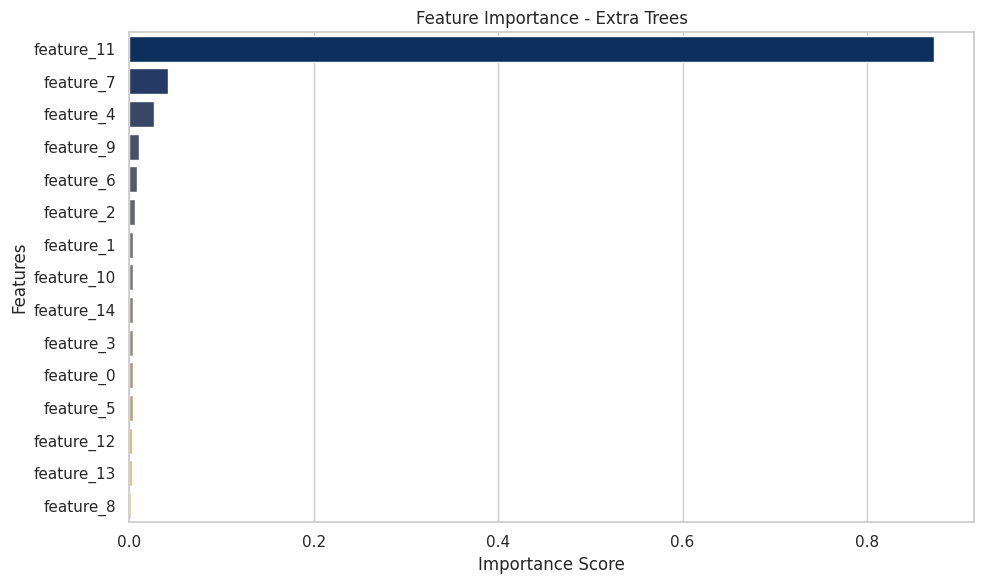

In [81]:
# Garante que X_train seja DataFrame
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]

modelos_com_importance = ['Random Forest', 'Gradient Boosting', 'AdaBoost',
                          'XGBoost', 'LightGBM', 'Extra Trees', 'HistGradientBoosting']

for nome in modelos_com_importance:
    model = models[nome]
    model.fit(X_train, y_train)

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        # Garantir que os arrays tenham o mesmo comprimento
        if len(importances) != len(feature_names):
            print(f"[Aviso] Dimensão incompatível no modelo {nome}")
            continue

        df_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=df_imp, palette='cividis')
        plt.title(f'Feature Importance - {nome}')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()

# Part 11 - Modelos final

In [82]:
# List to store F1-Score results
f1_results = []

# Loop through all models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    preds = model.predict(X_test)  # Make predictions

    f1 = f1_score(y_test, preds)  # Calculate F1-score

    # Save result
    f1_results.append({
        "Model": name,
        "F1-Score": round(f1, 4)
    })

# Create DataFrame and sort by F1-Score
df_f1_scores = pd.DataFrame(f1_results).sort_values(by="F1-Score", ascending=False)

# Display the results table
df_f1_scores

,Model,F1-Score
0,Naive Bayes,0.9963
2,Random Forest,0.9963
9,HistGradientBoosting,0.9963
4,AdaBoost,0.9963
5,XGBoost,0.9963
6,LightGBM,0.9963
7,Extra Trees,0.9963
8,Bagging,0.9951
3,Gradient Boosting,0.9939
1,KNN,0.9926


In [86]:
# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Recall": rec,
        "F1-Score": f1
    })

# DataFrame with evaluation metrics
df_metrics = pd.DataFrame(results)

# Highlight the best model in each metric with yellow background
highlight = df_metrics[["Accuracy", "Recall", "F1-Score"]].apply(lambda col: col == col.max())
highlight_color = 'background-color: green'
styled_df = df_metrics.style.apply(lambda df: highlight.replace({True: highlight_color, False: ''}), axis=None)

# Display the styled DataFrame
styled_df

,Model,Accuracy,Recall,F1-Score
0,Naive Bayes,0.998500,0.995098,0.996319
1,KNN,0.997000,0.987745,0.992611
2,Random Forest,0.998500,0.995098,0.996319
3,Gradient Boosting,0.997500,0.992647,0.993865
4,AdaBoost,0.998500,0.995098,0.996319
5,XGBoost,0.998500,0.995098,0.996319
6,LightGBM,0.998500,0.995098,0.996319
7,Extra Trees,0.998500,0.995098,0.996319
8,Bagging,0.998000,0.995098,0.995098
9,HistGradientBoosting,0.998500,0.995098,0.996319


In [85]:
# Create folder to save the models
os.makedirs("saved_models", exist_ok=True)

# Save each trained model
for name, model in models.items():
    filename = f"saved_models/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f"Model saved: {filename}")

Model saved: saved_models/naive_bayes.pkl
Model saved: saved_models/knn.pkl
Model saved: saved_models/random_forest.pkl
Model saved: saved_models/gradient_boosting.pkl
Model saved: saved_models/adaboost.pkl
Model saved: saved_models/xgboost.pkl
Model saved: saved_models/lightgbm.pkl
Model saved: saved_models/extra_trees.pkl
Model saved: saved_models/bagging.pkl
Model saved: saved_models/histgradientboosting.pkl


# Part 12 – Neural Networks Perceptron MLP

In [87]:
# Normalization using StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform test data
X_test = scaler.transform(X_test)

# Display the scaler parameters (mean and scale)
scaler

StandardScaler()

In [90]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Calcular pesos das classes com base nos dados de treino
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Dicionário com diferentes arquiteturas de redes neurais
modelos_nn = {
    "Perceptron": Sequential([
        Dense(1, input_dim=X_train.shape[1], activation='sigmoid')
    ]),

    "MLP_Small": Sequential([
        Dense(32, input_dim=X_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ]),

    "MLP_Medium": Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),

    "MLP_Large": Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),

    "MLP_Deep": Sequential([
        Dense(256, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
}

# Compilar e armazenar resumos dos modelos (opcional)
summaries = {}
for name, model in modelos_nn.items():
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    print(f"\nModel Summary: {name}")
    summaries[name] = model.summary()

# Criar diretório para salvar os modelos treinados
os.makedirs("saved_models_nn", exist_ok=True)

# Return the model names (optional)
summaries.keys()

print("Class weights:", class_weight_dict)


Model Summary: Perceptron


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)


Model Summary: MLP_Small


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)


Model Summary: MLP_Medium


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)


Model Summary: MLP_Large


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)


Model Summary: MLP_Deep


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 256)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,361 (185.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 0 (0.00 B)

Class weights: {0: 0.6279434850863422, 1: 2.4539877300613497}


In [91]:
# Dicionário para armazenar os históricos de treinamento
historicos = {}

# Treinar todos os modelos com class_weight
for name, model in modelos_nn.items():
    print(f"\n Training model: {name}")

    # Compilar novamente por segurança
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Treinar com pesos de classe
    history = model.fit(X_train, y_train,
                        epochs=30,
                        batch_size=32,
                        validation_split=0.2,
                        class_weight=class_weight_dict,  # <- Balanceamento aplicado aqui
                        verbose=1,
                        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

    # Armazenar histórico
    historicos[name] = history.history

    # Salvar o modelo treinado
    model.save(f"saved_models_nn/{name}.h5")


 Training model: Perceptron
Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7181 - loss: 0.4475 - val_accuracy: 0.8081 - val_loss: 0.4548
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8270 - loss: 0.3402 - val_accuracy: 0.8919 - val_loss: 0.3572
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9160 - loss: 0.2692 - val_accuracy: 0.9550 - val_loss: 0.2881
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.2209 - val_accuracy: 0.9831 - val_loss: 0.2380
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.1810 - val_accuracy: 0.9931 - val_loss: 0.2005
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9928 - loss: 0.1536 - val_accuracy: 0.9969 - val_loss: 0.1713
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.1344 - val_accuracy: 0.9981 - val_loss: 0.1480
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9982 - lo

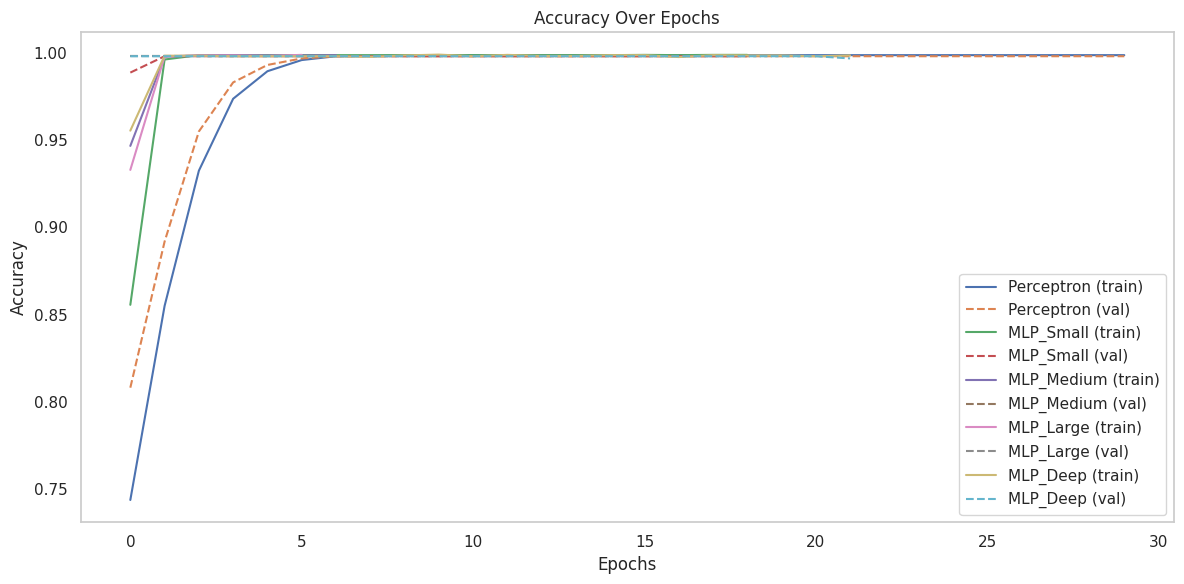

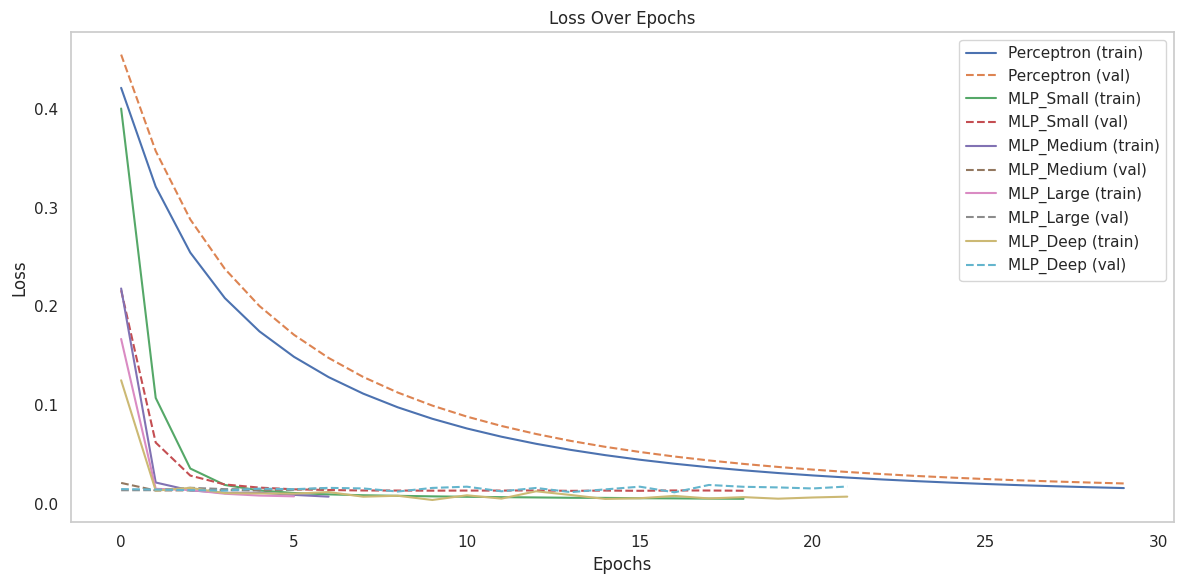

Model saved: saved_models_nn/Perceptron.keras
Model saved: saved_models_nn/MLP_Small.keras
Model saved: saved_models_nn/MLP_Medium.keras
Model saved: saved_models_nn/MLP_Large.keras
Model saved: saved_models_nn/MLP_Deep.keras


In [92]:
sns.set(style="whitegrid")

# Accuracy Plot
plt.figure(figsize=(12, 6))
for name, hist in historicos.items():
    plt.plot(hist['accuracy'], label=f"{name} (train)")
    plt.plot(hist['val_accuracy'], linestyle='--', label=f"{name} (val)")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Loss Plot
plt.figure(figsize=(12, 6))
for name, hist in historicos.items():
    plt.plot(hist['loss'], label=f"{name} (train)")
    plt.plot(hist['val_loss'], linestyle='--', label=f"{name} (val)")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Create folder if it doesn't exist
os.makedirs("saved_models_nn", exist_ok=True)

# Save each trained model
for name, model in modelos_nn.items():
    model_path = f"saved_models_nn/{name}.keras"
    model.save(model_path)
    print(f"Model saved: {model_path}")

46/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


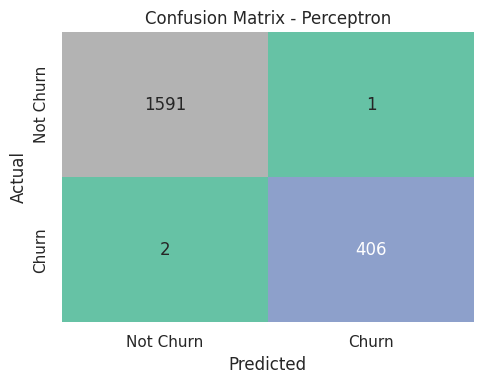

 1/63 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


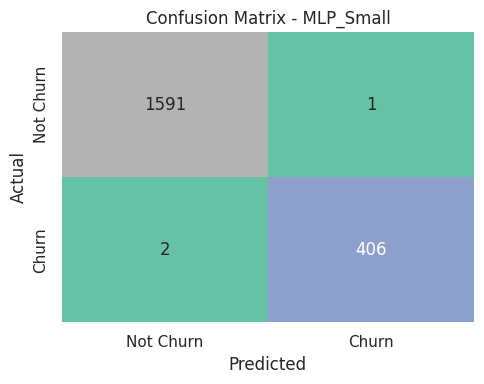

 1/63 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


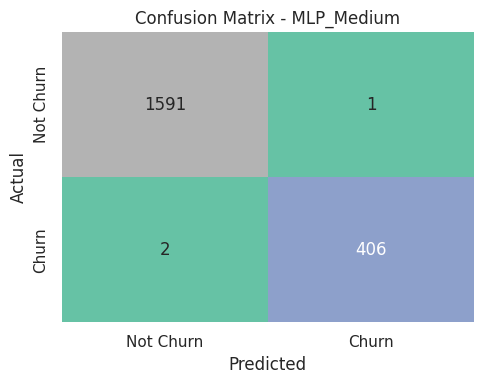

 1/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


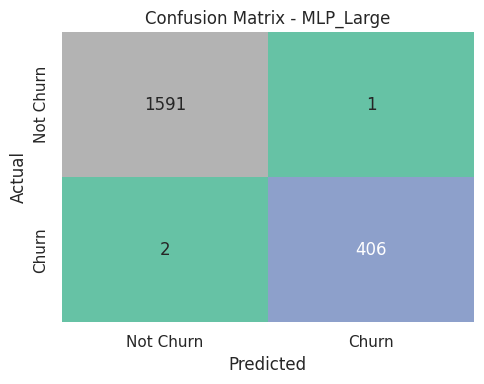

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


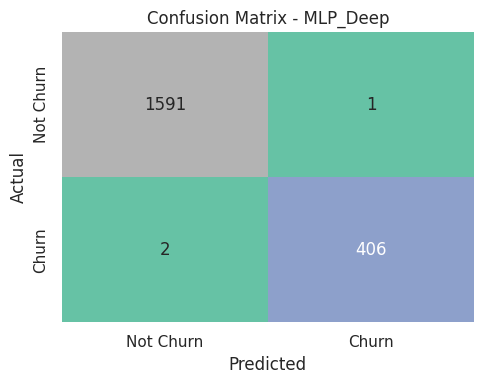

In [95]:
# Loop through the saved neural network models
for name in modelos_nn.keys():
    model_path = f"saved_models_nn/{name}.keras"
    
    # Check if the model file exists before loading
    if not os.path.exists(model_path):
        print(f"Model not found: {model_path}")
        continue

    # Load the trained model
    loaded_model = tf.keras.models.load_model(model_path)

    # Make prediction on test set
    y_proba = loaded_model.predict(X_test)
    y_pred = (y_proba >= 0.5).astype(int).ravel()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot using seaborn
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Set2", cbar=False,
                xticklabels=["Not Churn", "Churn"],
                yticklabels=["Not Churn", "Churn"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

45/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


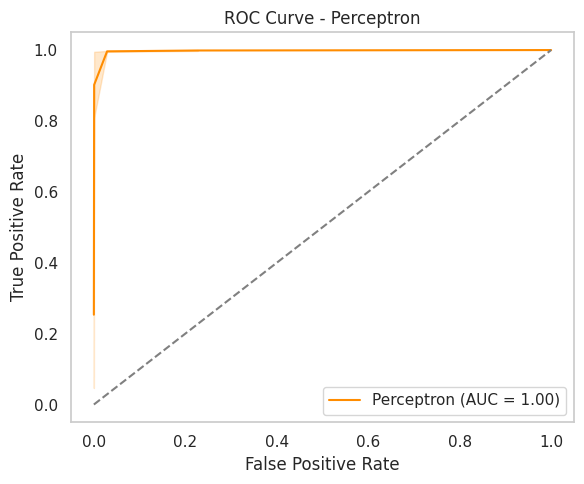

44/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


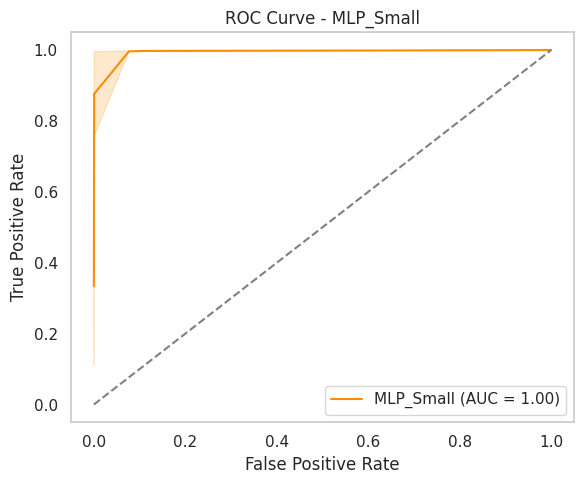

 1/63 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


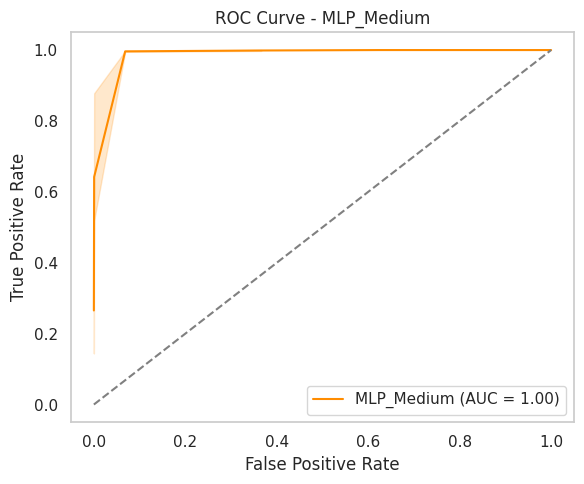

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


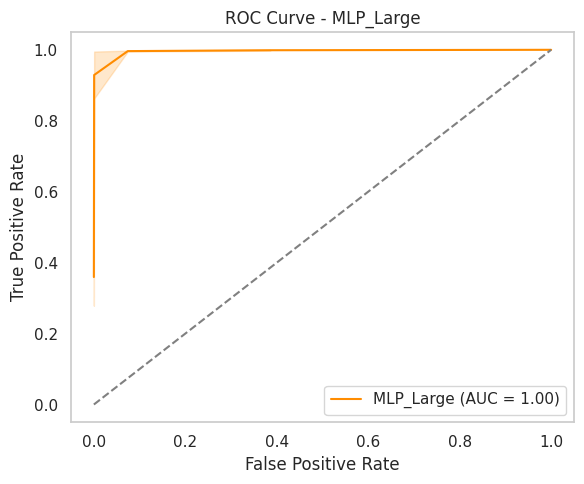

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


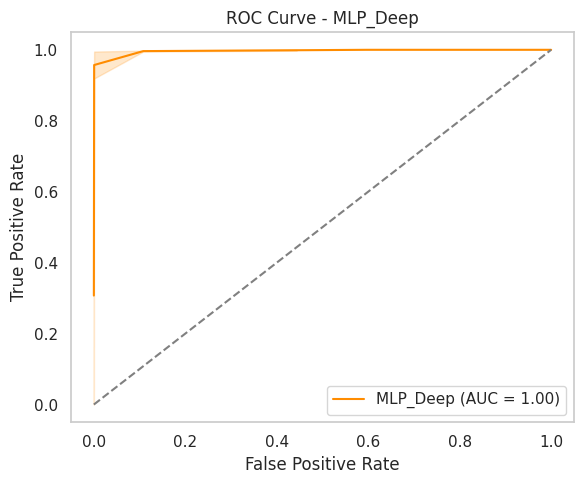

In [96]:
# Set seaborn style
sns.set(style="whitegrid")

# Loop through each saved neural network model
for name in modelos_nn.keys():
    model_path = f"saved_models_nn/{name}.keras"

    # Check if the model exists
    if not os.path.exists(model_path):
        print(f"Model not found: {model_path}")
        continue

    # Load the model
    loaded_model = tf.keras.models.load_model(model_path)

    # Make probability predictions
    y_proba = loaded_model.predict(X_test).ravel()

    # Calculate FPR, TPR and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(6, 5))
    sns.lineplot(x=fpr, y=tpr, label=f"{name} (AUC = {roc_auc:.2f})", color="darkorange")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [97]:
results_nn = []

# Loop through saved neural network models
for name in modelos_nn.keys():
    model_path = f"saved_models_nn/{name}.keras"

    if not os.path.exists(model_path):
        print(f"Model not found: {model_path}")
        continue

    model = tf.keras.models.load_model(model_path)

    # Predict probabilities and binarize using threshold = 0.5
    y_pred_proba = model.predict(X_test).ravel()
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Store results
    results_nn.append({
        "Model": name,
        "Accuracy": acc,
        "F1-score": f1,
        "Recall": recall,
        "Precision": precision
    })

# Convert to DataFrame
df_results_nn = pd.DataFrame(results_nn)

# Function to highlight the best value in each metric column
def highlight_max(s):
    return ['background-color: green' if v == s.max() else '' for v in s]

# Display with highlights for best models
display(df_results_nn.style.apply(highlight_max, subset=["Accuracy", "F1-score", "Recall", "Precision"]))

46/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 1/63 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 1/63 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 1/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Model,Accuracy,F1-score,Recall,Precision
0,Perceptron,0.998500,0.996319,0.995098,0.997543
1,MLP_Small,0.998500,0.996319,0.995098,0.997543
2,MLP_Medium,0.998500,0.996319,0.995098,0.997543
3,MLP_Large,0.998500,0.996319,0.995098,0.997543
4,MLP_Deep,0.998500,0.996319,0.995098,0.997543
